In [1]:
import uproot, collections
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
from tqdm import tqdm
import pandas as pd
import ROOT
import glob
import os

Welcome to JupyROOT 6.30/04


In [8]:
f = uproot.open('/eos/experiment/faser/sim/mc22/genie/200003/ntp/s0008/FaserMC-MC22_Genie_all_600invfb_v1-200003-00000-s0008-NTUP.root')
f['m_NuHit_tree'].show()

emu_mc = f['m_NuHit_tree'].arrays(['m_x_end',
                      'm_y_end',
                      'm_z_end',
                      'm_x_end_global',
                      'm_y_end_global',
                      'm_z_end_global',
                      'm_px_MC',
                      'm_py_MC',
                      'm_pz_MC',
                      'm_base',
                      'm_plate',
                      'm_event_id',
                      'm_pdg_MC'], library='ak')

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
m_runnumber          | int32_t                  | AsDtype('>i4')
m_event_id           | int32_t                  | AsDtype('>i4')
m_x_start            | float                    | AsDtype('>f4')
m_y_start            | float                    | AsDtype('>f4')
m_z_start            | float                    | AsDtype('>f4')
m_x_end              | float                    | AsDtype('>f4')
m_y_end              | float                    | AsDtype('>f4')
m_z_end              | float                    | AsDtype('>f4')
m_slope_x            | float                    | AsDtype('>f4')
m_slope_y            | float                    | AsDtype('>f4')
m_slope_z            | float                    | AsDtype('>f4')
m_track_id_hit       | int32_t                  | AsDtype('>i4')
m_track_id_MC        | int32_t                  | AsDtype(

In [24]:
# mu = {}
# branches = ['m_x_end',
#             'm_y_end',
#             'm_z_end',
#             'm_x_end_global',
#             'm_y_end_global',
#             'm_z_end_global',
#             'm_px_MC',
#             'm_py_MC',
#             'm_pz_MC',
#             'm_base',
#             'm_plate',
#             'm_event_id',
#             'm_pdg_MC']
# for branch in branches:
#     mu[branch] = []
# for batch in uproot.iterate("/eos/experiment/faser/sim/mc22/genie/200003/ntp/s0008/FaserMC-MC22_Genie_all*.root:m_NuHit_tree", branches, library='ak', use_threads=True, num_workers=2, batch_size=800000):
#     for branch in branches:
#         mu[branch].extend(batch[branch])


In [25]:
# def uproot_open(file_path, branches):
#     f_1 = uproot.open(file_path)
#     f1 = f_1['m_NuHit_tree'].arrays(branches, library='ak')
#     return f1

In [26]:
# branches = ['m_x_end',
#             'm_y_end',
#             'm_z_end',
#             'm_x_end_global',
#             'm_y_end_global',
#             'm_z_end_global',
#             'm_px_MC',
#             'm_py_MC',
#             'm_pz_MC',
#             'm_base',
#             'm_plate',
#             'm_event_id',
#             'm_pdg_MC']
# mu = []
# file_paths = glob.glob("/eos/experiment/faser/sim/mc22/genie/200003/ntp/s0008/FaserMC-MC22_Genie_all*.root")
# for file in file_paths:
#     mu.append(uproot_open(file, branches))

In [27]:
# branches = ['m_x_end',
#             'm_y_end',
#             'm_z_end',
#             'm_x_end_global',
#             'm_y_end_global',
#             'm_z_end_global',
#             'm_px_MC',
#             'm_py_MC',
#             'm_pz_MC',
#             'm_base',
#             'm_plate',
#             'm_event_id',
#             'm_pdg_MC']
# mu = uproot.concatenate("/eos/experiment/faser/sim/mc22/genie/200003/ntp/s0008/FaserMC-MC22_Genie_all*.root:m_NuHit_tree", branches, library='ak')

In [11]:
f1 = uproot.open('/eos/user/a/agarabag/emu_calypso/run/FaserMC-MC22_Genie_all_600invfb_v1-200003-00000-00009-s0010-r0014-PHYS.root')
# f1 = uproot.open('/eos/user/a/agarabag/emu_calypso/run/FaserMC-MC22_Genie_Combined_s0010-r0014-PHYS.root')

f1['nt'].show()

sct = f1['nt'].arrays(['Track_x0',
                      'Track_y0',
                      'Track_z0',
                      'Track_px0',
                      'Track_py0',
                      'Track_pz0',
                      'SpacePoint_z',
                      't_st0_z',
                      't_st0_y',
                      't_st0_x',
                      'SpacePoint_z',
                      'SpacePoint_y',
                      'eventID',
                      'Track_Chi2',
                      'Track_nDoF',
                      'Track_X_atIFT',
                      'Track_Y_atIFT',
                      'Track_Tx_atIFT',
                      'Track_Ty_atIFT',
                      't_pdg'], library='ak')

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | int32_t                  | AsDtype('>i4')
eventID              | int32_t                  | AsDtype('>i4')
eventTime            | int32_t                  | AsDtype('>i4')
BCID                 | int32_t                  | AsDtype('>i4')
inGRL                | int32_t                  | AsDtype('>i4')
fillNumber           | int32_t                  | AsDtype('>i4')
betaStar             | float                    | AsDtype('>f4')
crossingAngle        | float                    | AsDtype('>f4')
distanceToCollidi... | int32_t                  | AsDtype('>i4')
distanceToUnpairedB1 | int32_t                  | AsDtype('>i4')
distanceToUnpairedB2 | int32_t                  | AsDtype('>i4')
distanceToInboundB1  | int32_t                  | AsDtype('>i4')
distanceToTrainStart | int32_t                  | AsDtype(

-2453.8901
-2590.7227


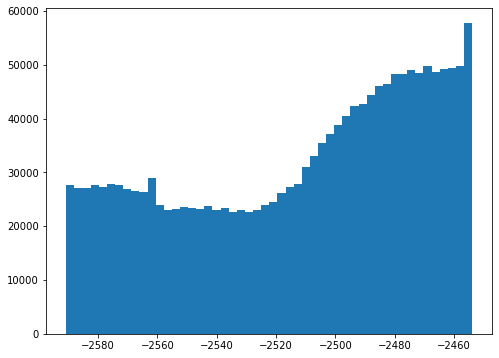

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(emu_mc.m_z_end_global[(emu_mc.m_plate>=300) & (emu_mc.m_plate<=400)], bins=50)

# plt.hist(emu.m_z_end_global, bins=50)
# print(ak.max(emu_mc.m_z_end_global))
# print(ak.min(emu_mc.m_z_end_global))

print(ak.max(emu_mc.m_z_end_global[(emu_mc.m_plate>=300) & (emu_mc.m_plate<=400)]))
print(ak.min(emu_mc.m_z_end_global[(emu_mc.m_plate>=300) & (emu_mc.m_plate<=400)]))
plt.show()

-1898.050048828125
-1885.25


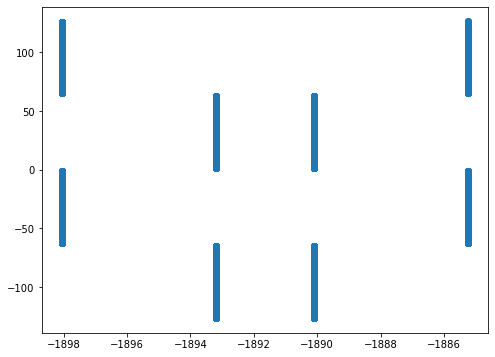

In [16]:
plt.figure(figsize=(8, 6))
# cut = ak.where((ak.flatten(sct.SpacePoint_z)<-1870))
cut = ak.where((ak.flatten(sct.SpacePoint_z)<-1880))

print(ak.min(ak.flatten(sct.SpacePoint_z)[cut]))
print(ak.max(ak.flatten(sct.SpacePoint_z)[cut]))

plt.plot(ak.flatten(sct.SpacePoint_z)[cut], ak.flatten(sct.SpacePoint_y)[cut], 'o')
# plt.plot(ak.flatten(sct.SpacePoint_z), ak.flatten(sct.SpacePoint_y), 'o')

plt.show()

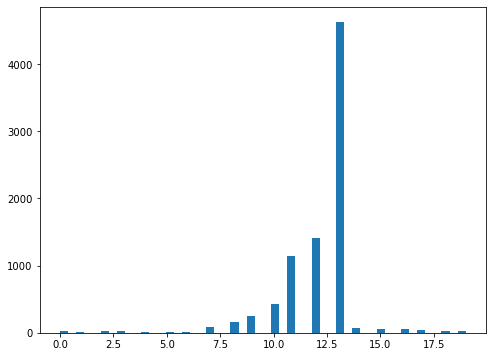

In [35]:
plt.figure(figsize=(8, 6))
cut = ak.where((abs(ak.flatten(sct.Track_nDoF))<20))
plt.hist(ak.flatten(sct.Track_nDoF)[cut], bins=50)
plt.show()

In [ ]:
plt.hist(emu.m_plate)
print(np.max(emu.m_plate))
plt.show()

In [80]:
att = ak.num(sct['Track_x0'])
cutting = ak.where(att == 1)
sct = sct[cutting]

ift_cuts = ak.where((abs(ak.flatten(sct.Track_X_atIFT))<=125) & (abs(ak.flatten(sct.Track_Y_atIFT))<=125) &
                   (ak.flatten(sct.Track_Chi2)<50) & (abs(ak.flatten(sct.t_pdg))==13) )
emu_cuts = ak.where((emu.m_plate>=398) & (emu.m_plate<=400) & (abs(emu.m_y_end_global)<45) & 
                    (abs(emu.m_x_end_global)<115) & (abs(emu.m_pdg_MC)==13))
# emu_cuts = ak.where((abs(emu.m_pdg_MC)==13))

In [81]:
len(ak.flatten(sct.Track_X_atIFT)[ift_cuts])

330

In [82]:
len(emu.m_y_end[emu_cuts])

88

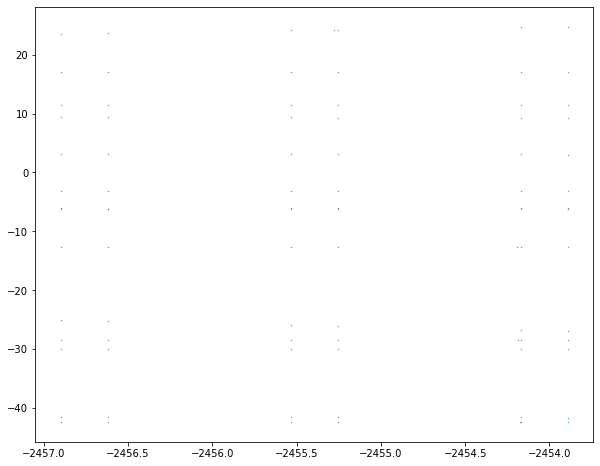

In [83]:
plt.figure(figsize=(10, 8))
plt.scatter(emu.m_z_end_global[emu_cuts], emu.m_y_end_global[emu_cuts], s=0.1)
plt.show()

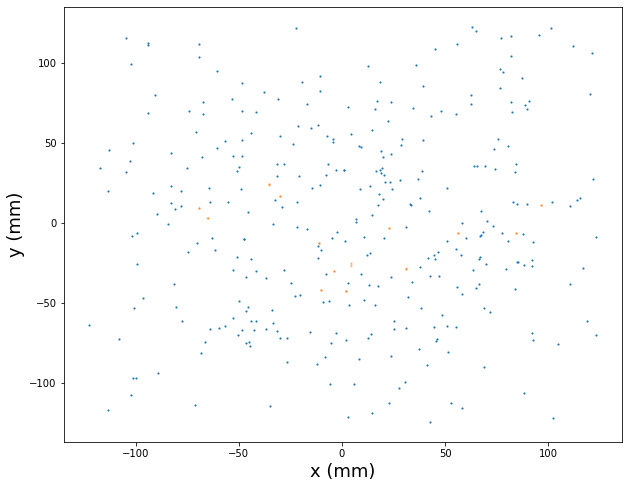

In [108]:
plt.figure(figsize=(10, 8))
plt.scatter(ak.flatten(sct.Track_X_atIFT)[ift_cuts], ak.flatten(sct.Track_Y_atIFT)[ift_cuts], marker='.', s=5)
plt.scatter(emu.m_x_end_global[emu_cuts], emu.m_y_end_global[emu_cuts], marker='.', s=5, alpha=0.2)
plt.xlabel(f'x (mm)', fontsize=18)
plt.ylabel(f'y (mm)', fontsize=18)
plt.show()


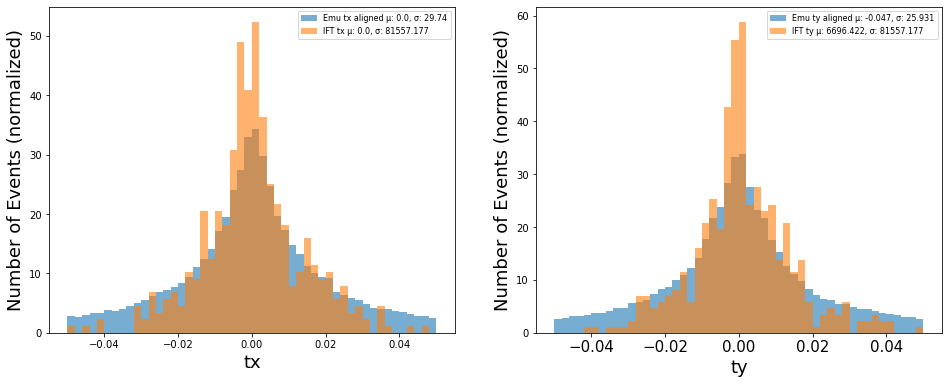

In [85]:
plt.figure(figsize=(16, 6))
bin = np.linspace(-0.05, 0.05, 51)
round_num = 3

#emulsion tx
plt.subplot(1, 2, 1)
tx_emulsion = emu.m_px_MC / emu.m_pz_MC
emutx_aligned_mean, emutx_aligned_std = round(np.median(tx_emulsion), round_num), round(np.std(tx_emulsion), round_num)
plt.hist(tx_emulsion, bins=bin, alpha=.6, density=True, label=f'Emu tx aligned µ: {emutx_aligned_mean}, σ: {emutx_aligned_std}')
#plot ift tx 
ift_tx = sct.Track_Tx_atIFT
ifttx_mean, ifttx_std = round(np.median(ift_tx), round_num), round(np.std(ift_tx), round_num)
plt.hist(ift_tx, bins=bin, alpha=.6, density=True, label=f'IFT tx µ: {ifttx_mean}, σ: {ifttx_std}')
plt.xlabel('tx', fontsize=18)
plt.ylabel('Number of Events (normalized)', fontsize=18)
plt.legend(fontsize=8)

plt.subplot(1, 2, 2)
#emulsion ty
ty_emulsion = emu.m_py_MC / emu.m_pz_MC
emuty_aligned_mean, emuty_aligned_std = round(np.mean(ty_emulsion), round_num), round(np.std(ty_emulsion), round_num)
plt.hist(ty_emulsion, bins=bin, alpha=.6, density=True, label=f'Emu ty aligned µ: {emuty_aligned_mean}, σ: {emuty_aligned_std}')
#plot ift ty
ift_ty = sct.Track_Ty_atIFT
iftty_mean, iftty_std = round(np.mean(ift_ty), round_num), round(np.std(ift_ty), round_num)
plt.hist(ift_ty, bins=bin, alpha=.6, density=True, label=f'IFT ty µ: {iftty_mean}, σ: {iftty_std}')
plt.xlabel('ty', fontsize=18)
plt.ylabel('Number of Events (normalized)', fontsize=18)
plt.xticks(fontsize=15)
plt.legend(fontsize=8)
plt.show()

In [94]:
# distance from IFT to closest emulsion plate [mm]
DistEmuIft = 555.84

# Z position of module 0 and 2, which is smallest z position in IFT 1st layer
module0_z = -1898.05 # mm

# Z position of module 4 and 6, which is largest z position in IFT 1st layer
module4_z = -1885.25 # mm

# Emulsion to IFT Extrapolation
# Step 1: Emulsion to IFT module 4
def emu2ift(x, y, tx, ty):
    Dist_tot = DistEmuIft + np.abs(module0_z - module4_z)
    x_pred = Dist_tot * tx + x
    y_pred = Dist_tot * ty + y
    return x_pred, y_pred

emu_x_pred, emu_y_pred = emu2ift(emu.m_x_end_global[emu_cuts], emu.m_x_end_global[emu_cuts], tx_emulsion[emu_cuts], ty_emulsion[emu_cuts])

def ift2ift(x, y, tx, ty):
    z=-1886.14
    Dist_tot = np.abs(z - module4_z)
    x_pred = Dist_tot * tx + x
    y_pred = Dist_tot * ty + y
    return x_pred, y_pred

ifttx = ak.flatten(sct.Track_Tx_atIFT)[ift_cuts]
iftty = ak.flatten(sct.Track_Ty_atIFT)[ift_cuts]
ift_x_pred, ift_y_pred = ift2ift(ak.flatten(sct.Track_X_atIFT)[ift_cuts], ak.flatten(sct.Track_Y_atIFT)[ift_cuts], ifttx, iftty)


In [95]:
Emu = pd.DataFrame({
    'x_pred': emu_x_pred,
    'y_pred': emu_y_pred,
    'tx': tx_emulsion[emu_cuts],
    'ty': ty_emulsion[emu_cuts],
    'eventID': emu.m_event_id[emu_cuts],
})

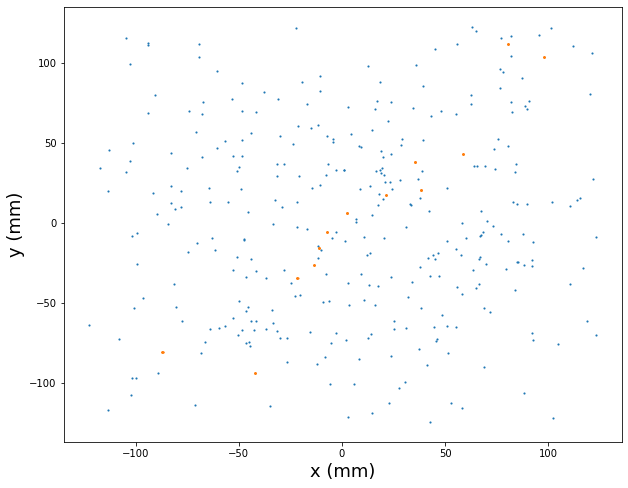

In [96]:
plt.figure(figsize=(10, 8))
# plt.scatter(ift_x_pred[abs(ift_y_pred)<200], ift_y_pred[abs(ift_y_pred)<200], marker='.', s=5)
plt.scatter(ift_x_pred, ift_y_pred, marker='.', s=5)
plt.scatter(Emu.x_pred[(abs(Emu.y_pred)<125) & (abs(Emu.x_pred)<125)], Emu.y_pred[(abs(Emu.y_pred)<125) & (abs(Emu.x_pred)<125)], marker='.', s=5)
plt.xlabel(f'x (mm)', fontsize=18)
plt.ylabel(f'y (mm)', fontsize=18)
plt.show()

In [97]:
evt_tmp = []
num = ak.num(sct['Track_X_atIFT'])
for i in tqdm(range(len(sct['eventID']))):
    evt_tmp.append(list(sct['eventID'][i] * np.ones(num[i])))

ift_evt = ak.flatten(ak.Array(evt_tmp))[ift_cuts]

100%|██████████| 448/448 [00:00<00:00, 3982.69it/s]


In [98]:
len(ift_evt)

330

In [99]:
len(ift_x_pred)

330

In [107]:
len(Emu.x_pred)

88

In [106]:
# x_res, y_res, tx_res, ty_res = 1.7211, 0.1811, 0.01406, 0.00295 # obtain these from truth match residual
x_res, y_res, tx_res, ty_res = 0.6, 0.02, 0.00047, 0.00025

def Chi2Match(chi2cut):
    Chi2 = []
    resx, resy, restx, resty = [], [], [], []
    sus = []
    for i in range(len(ift_x_pred)):
    #for i in range(1):
#         emu_filter = Emu[(Emu.x_pred > ift_x_pred[i]-3*x_res/2) & (Emu.x_pred < ift_x_pred[i]+3*x_res/2) & (Emu.y_pred > ift_y_pred[i]-3*y_res/2) & (Emu.y_pred < ift_y_pred[i]+3*y_res/2)]
        emu_filter = Emu
        chi2 = np.sqrt((ift_x_pred[i]-emu_filter.x_pred)**2/(x_res)**2 + (ift_y_pred[i]-emu_filter.y_pred)**2/(y_res)**2 + (ifttx[i]-emu_filter.tx)**2/(tx_res)**2 + (iftty[i]-emu_filter.ty)**2/(ty_res)**2)
        Chi2.append(chi2)
        if np.min(chi2) < chi2cut: 
            min_num = np.where(chi2==np.min(chi2))[0][0]
            resx.append(ift_x_pred[i] - emu_filter.x_pred.iloc[min_num])
            resy.append(ift_y_pred[i] - emu_filter.y_pred.iloc[min_num])
            restx.append(ifttx[i] - emu_filter.tx.iloc[min_num])
            resty.append(iftty[i] - emu_filter.ty.iloc[min_num])

            if ift_evt[i] == emu_filter.eventID.iloc[min_num]: # Mark success if the event ID is matched
                sus.append(1)
            else: 
                sus.append(0)
    return sus, Chi2, resx, resy, restx, resty

sus, chi2, resx, resy, restx, resty = Chi2Match(100) # choose 20 as the mininum chi2 cut
print(resx)
print(sus)
sus_count = collections.Counter(sus)
print(sus_count[1])
print(sus_count[0])
print(len(resx))
print(f'Successfully matched percent {sus_count[1]/(sus_count[0]+sus_count[1]):.3e} %')

[-16.125138890468392, 1.0143386026551884, 12.157945602671855, 4.544797414517636, -0.37788029649588495, -47.88921775291338]
[0, 1, 0, 0, 0, 0]
1
5
6
Successfully matched percent 1.667e-01 %


In [109]:
# find events that match using eventID
emu_event_ids = set(emu['m_event_id'])
sct_event_ids = set(sct['eventID'])

# Find the common event IDs between the two files
common_event_ids = emu_event_ids.intersection(sct_event_ids)

In [110]:
len(sct['eventID'])

448

In [111]:
len(common_event_ids)



45

In [2]:
header1 = """////////////////////////////////////////////////////////// 
// ---------- TrackSet : TS      0 0 0    0 ----------- //
//////////////////////////////////////////////////////////"""
header2 = """//////////////////////////////////////////
// ------ Area information : TS ------- //
//////////////////////////////////////////
"""
header3 = "// tid v1 v2        x        y        z      tx      ty    ip1    ip2     p  pmin  pmax mn pa sb dk of ps  n RmaxT RmaxL    rmsT    rmsL pl1 pl2 res"
header4 = "//       ipl        x        y        z      tx      ty type irec ngrains"


In [3]:
def read_text_file(file_path):
    data_dict = {}

    with open(file_path, 'r') as file:
        # Read inputforalign file
        content = file.read()
        
        # Selecting area of interest (between header 1 and header 2)
        content = content.split(header1)[1]
        content = content.split(header2)[0]

        # Splitting it into blocks
        content = content.split(header3)

        # Splitting into lines
        content = [block.split('\n') for block in content if block != '']

        # Further refining
        identifiers = []
        entries = []
        for block in content:
            # Selecting identifiers (pa is 14)
            identifiers.append(np.asarray([entry for entry in block[1].split(' ') if entry != '']))

            # Block entries occur at 5:-1
#             entries.append(np.asarray([np.asarray([x for x in entry.split(' ') if x != '']) for entry in block[5:-1]]))
            entries.append([np.asarray([x for x in entry.split(' ') if x != '']) for entry in block[5:-1]])
            
        identifiers = np.asarray(identifiers, dtype=object)
        entries = np.asarray(entries, dtype=object)

    return identifiers, entries

In [4]:
# Directory path containing the files
directory = '/eos/experiment/fasernu-data0/data/F222/feedback/'

# Create an empty DataFrame
data_df_z4 = pd.DataFrame(columns=['ipl', 'x', 'y', 'z', 'tx', 'ty', 'type', 'irec', 'ngrains', 'pa', 'taid', 'peak_tx', 'peak_ty'])

# bkg_z4_tx_peaks=[-0.00764301, -0.00140581, -0.00206856] #32063, 07261, 10266
# bkg_z4_ty_peaks=[0.00357337, 0.00390813, 0.00384348]

bkg_z4_tx_peaks = [-0.00140581, -0.00206856, -0.00764301] #07, 10, 32
bkg_z4_ty_peaks = [0.00390813, 0.00384348, 0.00357337]

# Get a list of all feedback files in the directory
file_list_z4 = glob.glob(os.path.join(directory, '*zone4*.feedback'))

# Iterate over the files
for file_idx, file_name in enumerate(file_list_z4):
    # Construct the full file path
    file_path = os.path.join(directory, file_name)
    print("processing: ", file_path)

    # Call the read_text_file function for each file
    identifiers, entries = read_text_file(file_path)

    # Get the 14th element of identifiers as pa
    pa = [pa_subarray[14] for pa_subarray in identifiers[1:]]
    
    # Get the 0th element of identifiers as event id
    taid = [id_subarray[0] for id_subarray in identifiers[1:]]

    for entry_index, entry in enumerate(entries[1:], start=1):
        for subarray in entry[1:]:
            # Create a DataFrame for the current subarray's data
            entry_data = pd.DataFrame([subarray], columns=['ipl', 'x', 'y', 'z', 'tx', 'ty', 'type', 'irec', 'ngrains'])
            
            pa_value = pa[entry_index - 1]
            entry_data['pa'] = pa_value
            
            id_value = taid[entry_index - 1]
            entry_data['taid'] = id_value
            
            peak_tx = bkg_z4_tx_peaks[file_idx]
            entry_data['peak_tx'] = peak_tx
            
            peak_ty = bkg_z4_ty_peaks[file_idx]
            entry_data['peak_ty'] = peak_ty

            # Append the current subarray's data to the main DataFrame
            data_df_z4 = pd.concat([data_df_z4, entry_data], ignore_index=True)


data_df_z4 = data_df_z4.astype(float)

processing:  /eos/experiment/fasernu-data0/data/F222/feedback/vtx_F222_zone4_reco07_89006.8_9706.9_pl261_v20231107_TFD100pl.feedback
processing:  /eos/experiment/fasernu-data0/data/F222/feedback/vtx_F222_zone4_reco10_10677.7_22283.6_pl266_v20231218_TFD100pl.feedback
processing:  /eos/experiment/fasernu-data0/data/F222/feedback/vtx_F222_zone4_reco32_66641.8_48788.6_pl063_v20230727_TFD100pl.feedback


In [5]:
file_list = glob.glob(os.path.join(directory, '*zone3*.feedback'))
data_df = pd.DataFrame(columns=['ipl', 'x', 'y', 'z', 'tx', 'ty', 'type', 'irec', 'ngrains', 'pa', 'taid', 'peak_tx', 'peak_ty'])

# bkg_z3_tx_peaks=[-0.00520954, -0.00760769, -0.00583613, -0.00172301, -0.00126507] #30041, 37044, 09115, 11191, 08245
# bkg_z3_ty_peaks=[0.00372549, 0.0040943, 0.00540361, 0.00372275, 0.00522484]

bkg_z3_tx_peaks = [-0.00126507, -0.00583613, -0.00172301, -0.00520954, -0.00760769]
bkg_z3_ty_peaks = [0.00522484, 0.00540361, 0.00372275, 0.00372549, 0.0040943] #08, 09, 11, 30, 37

# Iterate over the files
for file_idx, file_name in enumerate(file_list):
    # Construct the full file path
    file_path = os.path.join(directory, file_name)
    print("processing: ", file_path)

    # Call the read_text_file function for each file
    identifiers, entries = read_text_file(file_path)

    # Get the 14th element of identifiers as pa
    pa = [pa_subarray[14] for pa_subarray in identifiers[1:]]
    
    # Get the 0th element of identifiers as event id
    taid = [id_subarray[0] for id_subarray in identifiers[1:]]

    for entry_index, entry in enumerate(entries[1:], start=1):
        for subarray in entry[1:]:
            # Create a DataFrame for the current subarray's data
            entry_data = pd.DataFrame([subarray], columns=['ipl', 'x', 'y', 'z', 'tx', 'ty', 'type', 'irec', 'ngrains'])
            
            pa_value = pa[entry_index - 1]
            entry_data['pa'] = pa_value
            
            id_value = taid[entry_index - 1]
            entry_data['taid'] = id_value
            
            peak_tx = bkg_z3_tx_peaks[file_idx]
            entry_data['peak_tx'] = peak_tx
            
            peak_ty = bkg_z3_ty_peaks[file_idx]
            entry_data['peak_ty'] = peak_ty

            # Append the current subarray's data to the main DataFrame
            data_df = pd.concat([data_df, entry_data], ignore_index=True)


data_df_z3 = data_df.astype(float)

processing:  /eos/experiment/fasernu-data0/data/F222/feedback/vtx_F222_zone3_reco08_111611.8_9512.1_pl245_v20231109_TFD100pl.feedback
processing:  /eos/experiment/fasernu-data0/data/F222/feedback/vtx_F222_zone3_reco09_124516.5_10429.3_pl115_v20230826_TFD100pl.feedback
processing:  /eos/experiment/fasernu-data0/data/F222/feedback/vtx_F222_zone3_reco11_27013.5_21547.4_pl191_v20231010_TFD100pl.feedback
processing:  /eos/experiment/fasernu-data0/data/F222/feedback/vtx_F222_zone3_reco30_41804.0_49364.0_pl041_v20230828_TFD100pl.feedback
processing:  /eos/experiment/fasernu-data0/data/F222/feedback/vtx_F222_zone3_reco37_12170.3_68022.5_pl044_v20230725_TFD100pl.feedback


In [6]:
z3_mu = data_df_z3[data_df_z3['pa'] == 1]
z4_mu = data_df_z4[data_df_z4['pa'] == 1]


In [7]:
z3_mu

,ipl,x,y,z,tx,ty,type,irec,ngrains,pa,taid,peak_tx,peak_ty
182,247.0,111674.4,9525.3,349512.0,0.0207,0.0071,0.0,0.0,30.0,1.0,3119.0,-0.001265,0.005225
183,248.0,111700.7,9533.5,350845.0,0.0192,0.0062,0.0,0.0,30.0,1.0,3119.0,-0.001265,0.005225
184,250.0,111754.1,9550.0,353559.0,0.0237,0.0050,0.0,0.0,32.0,1.0,3119.0,-0.001265,0.005225
185,251.0,111785.2,9559.9,355137.0,0.0216,0.0058,0.0,0.0,28.0,1.0,3119.0,-0.001265,0.005225
186,253.0,111839.3,9577.0,357845.0,0.0190,0.0055,0.0,0.0,28.0,1.0,3119.0,-0.001265,0.005225
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,143.0,10584.9,68461.5,197312.0,-0.0113,0.0084,0.0,0.0,32.0,1.0,19847.0,-0.007608,0.004094
1356,144.0,10570.2,68465.9,198624.0,-0.0106,0.0008,0.0,0.0,32.0,1.0,19847.0,-0.007608,0.004094
1357,145.0,10554.4,68470.7,199987.0,-0.0111,0.0023,0.0,0.0,29.0,1.0,19847.0,-0.007608,0.004094
1358,146.0,10539.6,68474.9,201282.0,-0.0118,0.0028,0.0,0.0,32.0,1.0,19847.0,-0.007608,0.004094


In [8]:

print(z3_mu['taid'].nunique(), z3_mu['taid'].unique())
print(z4_mu['taid'].nunique(), z4_mu['taid'].unique())


5 [ 3119. 24625.  7366. 29724. 19847.]
3 [14341.  4897. 28023.]


In [9]:
z3_mu[z3_mu['taid'] == 3119]['peak_tx']

182   -0.001265
183   -0.001265
184   -0.001265
185   -0.001265
186   -0.001265
         ...   
261   -0.001265
262   -0.001265
263   -0.001265
264   -0.001265
265   -0.001265
Name: peak_tx, Length: 84, dtype: float64

In [10]:
z4_mu.groupby('taid')['z'].nunique()

taid
4897.0     73
14341.0    68
28023.0    92
Name: z, dtype: int64

In [11]:
max_z_idx = z4_mu.groupby('taid')['z'].idxmax()
x_values = z4_mu.loc[max_z_idx, 'z']
x_values

361    515484.0
281    507785.0
702    232789.0
Name: z, dtype: float64

In [9]:
z4_max_n_z_idx = z4_mu.groupby('taid')['z'].nlargest(10).reset_index(level=1)['level_1']

# print(z4_mu.loc[z4_max_n_z_idx])
z4_z_max_values = z4_mu.loc[z4_mu.loc[z4_max_n_z_idx].groupby('taid')['z'].idxmax()]
z4_z_min_values = z4_mu.loc[z4_mu.loc[z4_max_n_z_idx].groupby('taid')['z'].idxmin()]
# print(z4_z_max_values)

z4_delta_x = z4_z_max_values['x'].values - z4_z_min_values['x'].values
z4_delta_y = z4_z_max_values['y'].values - z4_z_min_values['y'].values
z4_delta_z = z4_z_max_values['z'].values - z4_z_min_values['z'].values

z4_apx_tx = z4_delta_x / z4_delta_z
z4_apx_ty = z4_delta_y / z4_delta_z

print(z4_apx_ty, z4_apx_tx)

[-0.02416486  0.01136152  0.00488515] [ 0.00365898  0.00573062 -0.03369136]


In [10]:
z3_max_n_z_idx = z3_mu.groupby('taid')['z'].nlargest(10).reset_index(level=1)['level_1']

z3_z_max_values = z3_mu.loc[z3_mu.loc[z3_max_n_z_idx].groupby('taid')['z'].idxmax()]
z3_z_min_values = z3_mu.loc[z3_mu.loc[z3_max_n_z_idx].groupby('taid')['z'].idxmin()]

z3_delta_x = z3_z_max_values['x'].values - z3_z_min_values['x'].values
z3_delta_y = z3_z_max_values['y'].values - z3_z_min_values['y'].values
z3_delta_z = z3_z_max_values['z'].values - z3_z_min_values['z'].values

z3_apx_tx = z3_delta_x / z3_delta_z
z3_apx_ty = z3_delta_y / z3_delta_z

print(z3_apx_ty, z3_apx_tx)

[ 0.00638815  0.02762376  0.00337842 -0.00533907  0.02234304] [ 0.01904299  0.00156436 -0.01127787  0.00173663 -0.00635765]


In [11]:
# Find the row index with the largest z value for each unique id
max_z_idx = z4_mu.groupby('taid')['z'].idxmax()
x_values = z4_mu.loc[max_z_idx, 'x'].values
y_values = z4_mu.loc[max_z_idx, 'y'].values
z_values = z4_mu.loc[max_z_idx, 'z'].values
tx_values = z4_mu.loc[max_z_idx, 'tx'].values
ty_values = z4_mu.loc[max_z_idx, 'ty'].values
z4_id = z4_mu.loc[max_z_idx, 'taid'].values
z4_peak_tx = z4_mu.loc[max_z_idx, 'peak_tx'].values
z4_peak_ty = z4_mu.loc[max_z_idx, 'peak_ty'].values



z3_max_z_idx = z3_mu.groupby('taid')['z'].idxmax()
z3_x_values = z3_mu.loc[z3_max_z_idx, 'x'].values
z3_y_values = z3_mu.loc[z3_max_z_idx, 'y'].values
z3_z_values = z3_mu.loc[z3_max_z_idx, 'z'].values
z3_tx_values = z3_mu.loc[z3_max_z_idx, 'tx'].values
z3_ty_values = z3_mu.loc[z3_max_z_idx, 'ty'].values
z3_id = z3_mu.loc[z3_max_z_idx, 'taid'].values
z3_peak_tx = z3_mu.loc[z3_max_z_idx, 'peak_tx'].values
z3_peak_ty = z3_mu.loc[z3_max_z_idx, 'peak_ty'].values


combined_x = np.concatenate((x_values, z3_x_values))
combined_y = np.concatenate((y_values, z3_y_values))
combined_z = np.concatenate((z_values, z3_z_values))
combined_tx = np.concatenate((z4_apx_tx-z4_peak_tx, z3_apx_tx-z3_peak_tx))
combined_ty = np.concatenate((z4_apx_ty-z4_peak_ty, z3_apx_ty-z3_peak_ty))
all_id = np.concatenate((z4_id, z3_id))
# print(len(combined_x), all_id, tx_values)
print(tx_values-z4_apx_tx, z3_tx_values-z3_apx_tx, ty_values-z4_apx_ty, z3_ty_values-z3_apx_ty)
print("################")
print(z4_apx_tx, z3_apx_tx, z4_apx_ty, z3_apx_ty)
print("################")
print(z4_apx_tx-z4_peak_tx, z3_apx_tx-z3_peak_tx, z4_apx_ty-z4_peak_ty, z3_apx_ty-z3_peak_ty)
# print(z4_apx_tx, z3_apx_tx)
# print(all_id)

[ 0.00014102 -0.00223062  0.00109136] [ 0.00025701  0.00353564  0.00077787  0.00086337 -0.00014235] [-1.03513578e-03 -6.15210743e-05 -1.78515044e-03] [ 0.00051185  0.00307624  0.00012158 -0.00286093 -0.00114304]
################
[ 0.00365898  0.00573062 -0.03369136] [ 0.01904299  0.00156436 -0.01127787  0.00173663 -0.00635765] [-0.02416486  0.01136152  0.00488515] [ 0.00638815  0.02762376  0.00337842 -0.00533907  0.02234304]
################
[ 0.00572754  0.00713643 -0.02604835] [ 0.02030806  0.00328737 -0.00367018  0.00757276 -0.00114811] [-0.02800834  0.00745339  0.00131178] [ 0.00116331  0.02390101 -0.00071588 -0.01074268  0.01861755]


In [16]:
print(tx_values, z3_tx_values, ty_values, z3_ty_values)


[ 0.0038  0.0035 -0.0326] [ 0.0193  0.0051 -0.0105  0.0026 -0.0065] [-0.0252  0.0113  0.0031] [ 0.0069  0.0307  0.0035 -0.0082  0.0212]


In [230]:
(np.max(combined_z)-np.min(combined_z))/1e4 #cm

31.7242

In [196]:
# distance from IFT to closest emulsion plate [mm]
DistEmuIft = 555.84

# Z position of module 0 and 2, which is smallest z position in IFT 1st layer
module0_z = -1898.05 # mm

# Z position of module 4 and 6, which is largest z position in IFT 1st layer
module4_z = -1885.25 # mm

# Emulsion to IFT Extrapolation
# Step 1: Emulsion to IFT module 4
def emu2ift(x, y, tx, ty):
    Dist_tot = DistEmuIft + np.abs(module0_z - module4_z)
    x_pred = Dist_tot * tx + x
    y_pred = Dist_tot * ty + y
    return x_pred, y_pred

combined_trans_emu_x_t = np.concatenate((x_values/1e3 + 121, z3_x_values/1e3 - 1))
combined_trans_emu_y_t = np.concatenate((y_values/1e3 + 92, z3_y_values/1e3 + 92))

# emu_x_pred, emu_y_pred = emu2ift(combined_x, combined_y, combined_tx, combined_ty)
emu_x_pred, emu_y_pred = emu2ift(combined_trans_emu_x_t, combined_trans_emu_y_t, combined_tx, combined_ty)


In [197]:
print(combined_x/1e3 - emu_x_pred/1e3,
combined_y/1e3 - emu_y_pred/1e3)

[ 10.96693797  89.50629076  61.55881466 114.21998095  27.14992094
  10.52134582 124.64385244  40.88787206] [18.80892423 11.17638827 49.33425972 10.28408598 25.17193605 68.31703026
  9.55271315 52.45333483]


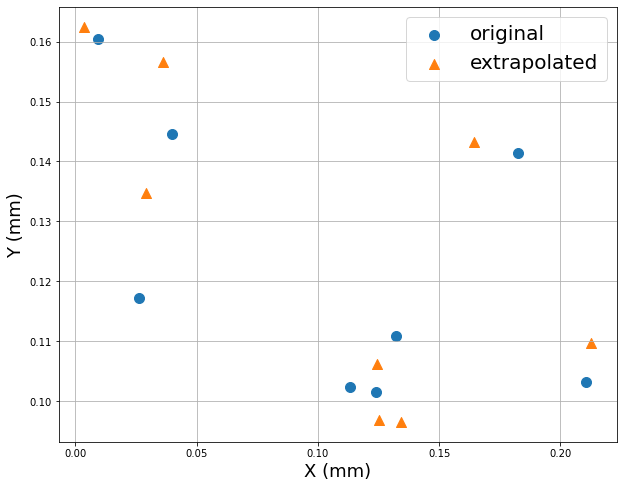

In [199]:
plt.figure(figsize=(10, 8))
plt.scatter(combined_trans_emu_x_t/1e3 , combined_trans_emu_y_t/1e3 , s=100, label='original')
# plt.scatter(combined_x/1e3 , combined_y/1e3 , s=100, label='original')
plt.scatter(emu_x_pred/1e3 , emu_y_pred/1e3 , s=100, marker='^', label='extrapolated')
plt.xlabel('X (mm)', fontsize=18)
plt.ylabel('Y (mm)', fontsize=18)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

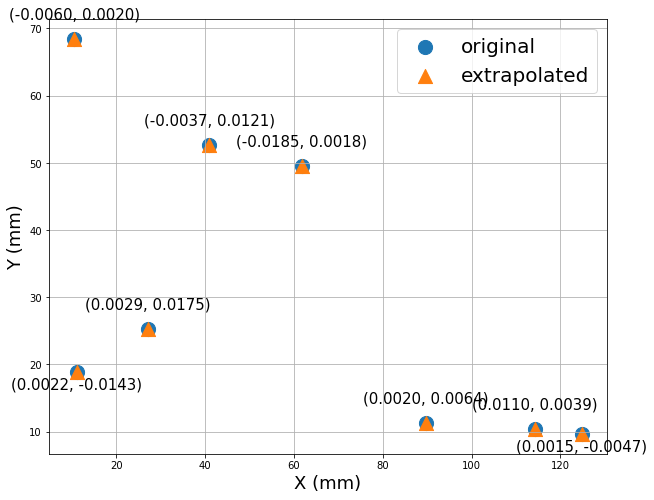

In [195]:

# Assuming you have the following arrays: combined_x, combined_y, emu_x_pred, emu_y_pred

# Calculate the residuals
residuals_x = emu_x_pred - combined_x
residuals_y = emu_y_pred - combined_y

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(combined_x/1e3 , combined_y/1e3 , s=200, label='original')
plt.scatter(emu_x_pred/1e3 , emu_y_pred/1e3 , s=200, marker='^', label='extrapolated')

# Add the residuals text near each point
for x, y, res_x, res_y in zip(combined_x/1e3, combined_y/1e3, residuals_x/1e3, residuals_y/1e3):
    if res_y < 0:
        plt.text(x, y-3, f"({res_x:.4f}, {res_y:.4f})", fontsize=15, ha='center', va='bottom')
    else:
        plt.text(x, y+3, f"({res_x:.4f}, {res_y:.4f})", fontsize=15, ha='center')


plt.xlabel('X (mm)', fontsize=18)
plt.ylabel('Y (mm)', fontsize=18)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

58.5369 515.484


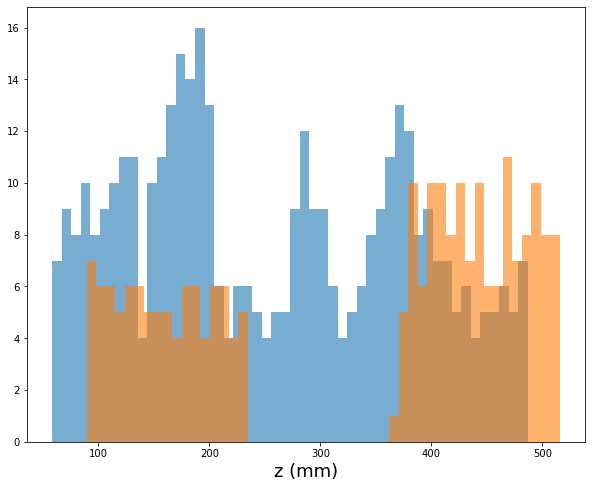

In [13]:
plt.figure(figsize=(10, 8))
# plt.hist(z3_mu['z']/1e3-3000, bins=50, alpha=0.6)
# plt.hist(z4_mu['z']/1e3-3000, bins=50, alpha=0.6)
plt.hist(z3_mu['z']/1e3, bins=50, alpha=0.6)
plt.hist(z4_mu['z']/1e3, bins=50, alpha=0.6)
print(np.min(z3_mu['z']/1e3), np.max(z4_mu['z']/1e3))
plt.xlabel('z (mm)', fontsize=18)
plt.show()

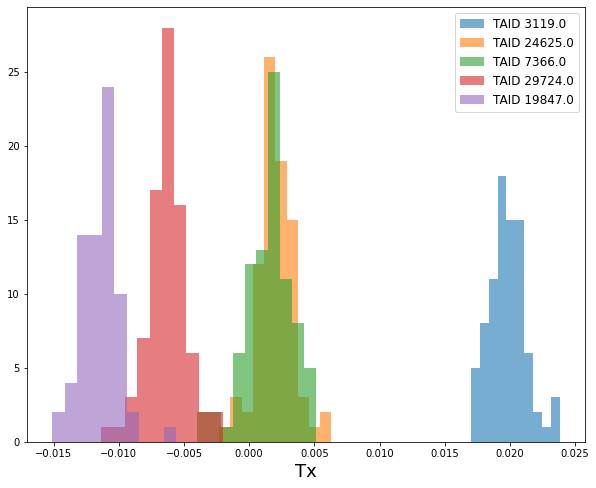

In [16]:
unique_taid = z3_mu['taid'].unique()

plt.figure(figsize=(10, 8))

for taid in unique_taid:
    subset = z3_mu[z3_mu['taid'] == taid]
    plt.hist(subset['tx'], bins=10, alpha=0.6, label=f'TAID {taid}')

plt.xlabel('Tx', fontsize=18)
plt.legend(fontsize=12)
plt.show()

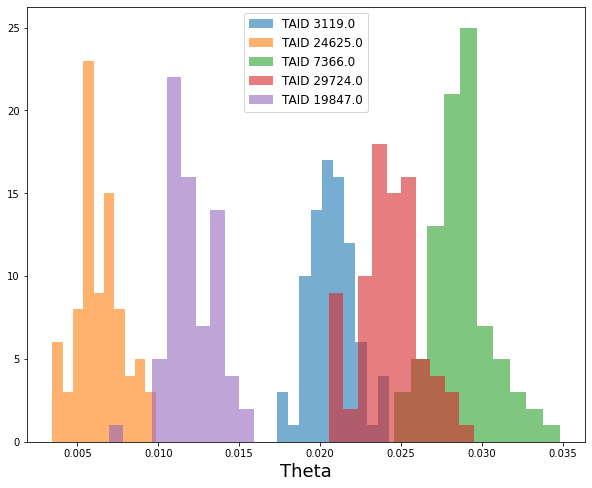

In [22]:
plt.figure(figsize=(10, 8))

for taid in unique_taid:
    subset = z3_mu[z3_mu['taid'] == taid]
    plt.hist(np.arctan(np.sqrt(subset['tx']**2 + subset['ty']**2)), bins=10, alpha=0.6, label=f'TAID {taid}')

plt.xlabel('Theta', fontsize=18)
plt.legend(fontsize=12)
plt.show()

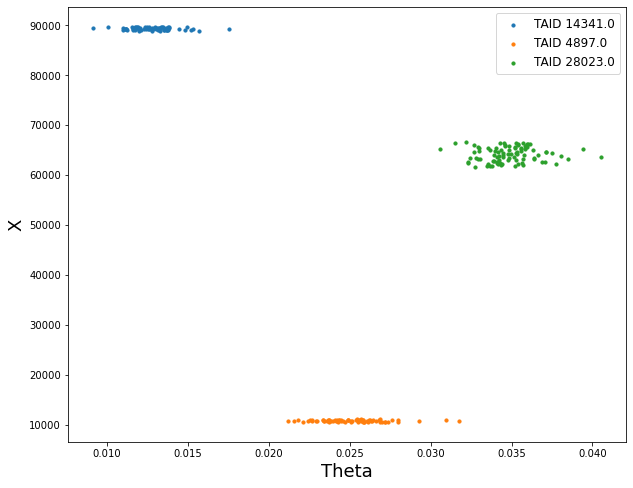

In [45]:
plt.figure(figsize=(10, 8))

for taid in unique_taid:
    subset = filtered_df[filtered_df['taid'] == taid]
    plt.scatter(np.arctan(np.sqrt(subset['tx']**2 + subset['ty']**2)), subset['x'], s=10, label=f'TAID {taid}')

plt.xlabel('Theta', fontsize=18)
plt.ylabel('X', fontsize=18)
plt.legend(fontsize=12)
plt.show()

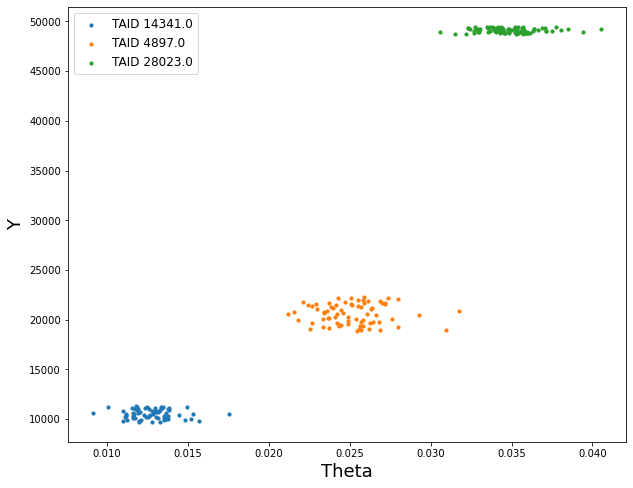

In [46]:
plt.figure(figsize=(10, 8))

for taid in unique_taid:
    subset = filtered_df[filtered_df['taid'] == taid]
    plt.scatter(np.arctan(np.sqrt(subset['tx']**2 + subset['ty']**2)), subset['y'], s=10, label=f'TAID {taid}')

plt.xlabel('Theta', fontsize=18)
plt.ylabel('Y', fontsize=18)
plt.legend(fontsize=12)
plt.show()

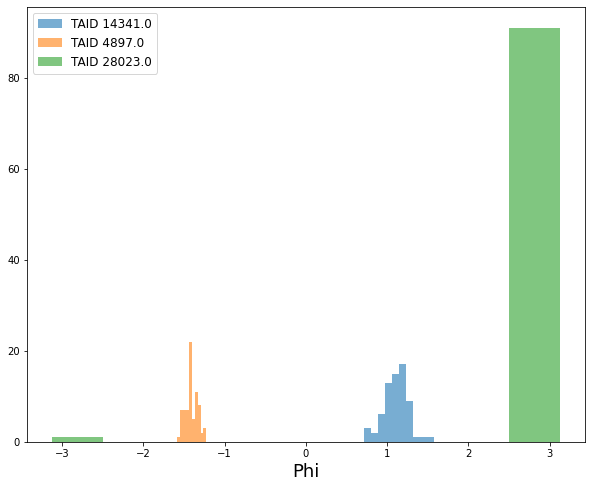

In [47]:
plt.figure(figsize=(10, 8))

for taid in unique_taid:
    subset = filtered_df[filtered_df['taid'] == taid]
    plt.hist(np.arctan2(subset['ty'], subset['tx']), bins=10, alpha=0.6, label=f'TAID {taid}')

plt.xlabel('Phi', fontsize=18)
plt.legend(fontsize=12)
plt.show()

In [17]:
unique_taid = filtered_df['taid'].unique()

plt.figure(figsize=(10, 8))

for taid in unique_taid:
    subset = filtered_df[filtered_df['taid'] == taid]
    plt.hist(subset['ty'], bins=10, alpha=0.6, label=f'TAID {taid}')

plt.xlabel('Ty', fontsize=18)
plt.legend(fontsize=12)
plt.show()

NameError: name 'filtered_df' is not defined

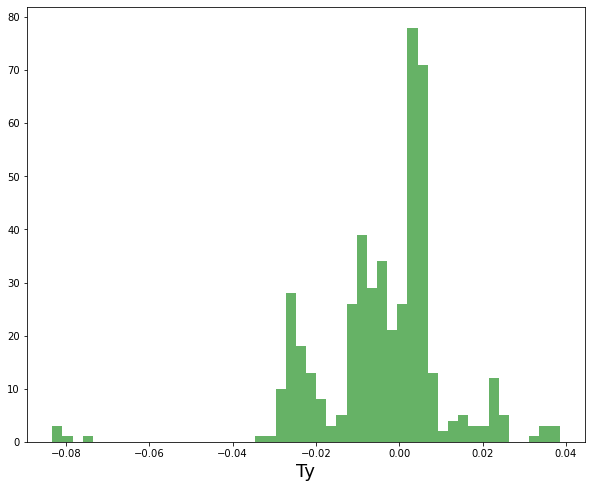

In [49]:
plt.figure(figsize=(10, 8))
plt.hist(filtered_df_non_mu['ty'], bins=50, alpha=0.6, color='green')
plt.xlabel('Ty', fontsize=18)
plt.show()

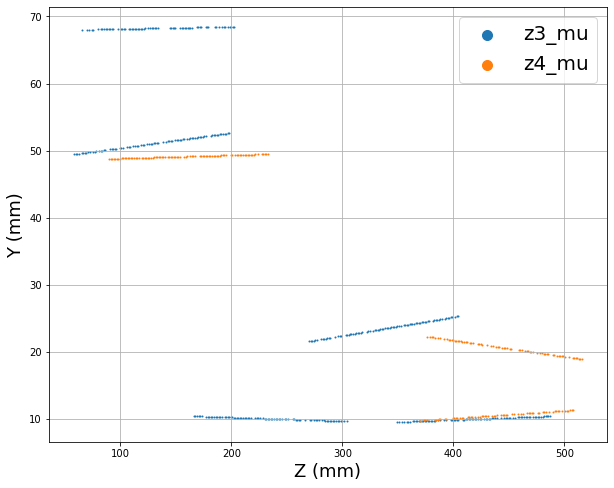

In [13]:
plt.figure(figsize=(10, 8))
# plt.scatter(z3_mu['x']/1e3 - 1, z3_mu['y']/1e3 + 92, s=1, label='z3_mu')
# plt.scatter(z4_mu['x']/1e3 + 121, z4_mu['y']/1e3 + 92, s=1.5, label='z4_mu')
plt.scatter(z3_mu['z']/1e3 , z3_mu['y']/1e3 , s=1, label='z3_mu')
plt.scatter(z4_mu['z']/1e3 , z4_mu['y']/1e3 , s=1, label='z4_mu')
plt.xlabel('Z (mm)', fontsize=18)
plt.ylabel('Y (mm)', fontsize=18)
plt.grid(True)
plt.legend(fontsize=20, markerscale=10)
plt.show()

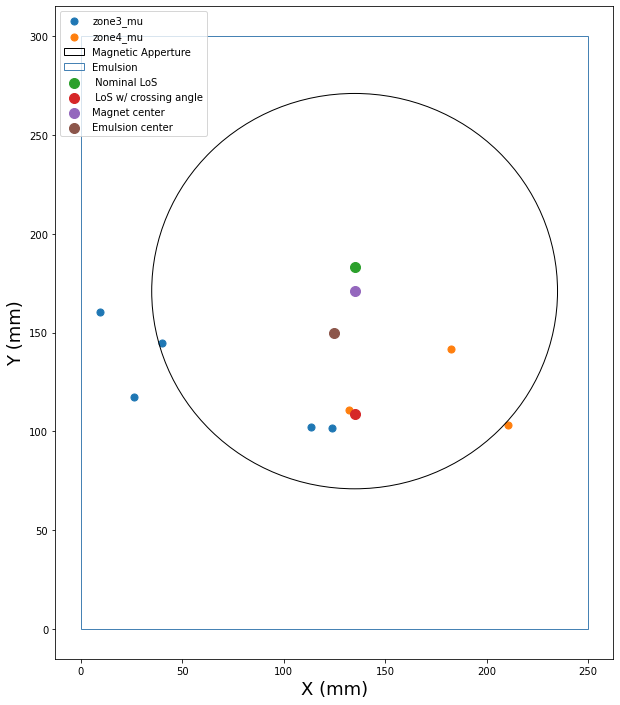

In [13]:
plt.figure(figsize=(10, 12))
plt.scatter(z3_x_values/1e3 - 1, z3_y_values/1e3 + 92, s=50, label='zone3_mu')
plt.scatter(x_values/1e3 + 121, y_values/1e3 + 92, s=50, label='zone4_mu')
# plt.scatter(z3_mu['x']/1e3 - 1, z3_mu['y']/1e3 + 92, s=50, label='zone3_mu')
# plt.scatter(z4_mu['x']/1e3 + 121, z4_mu['y']/1e3 + 92, s=50, label='zone4_mu')
# print(z3_id, z3_x_values/1e3 - 1)
# print(z4_id, x_values/1e3 + 121)

from matplotlib.patches import Rectangle, Circle
circle = Circle((125+10, 171), 100, edgecolor='black', facecolor='none', label='Magnetic Apperture')
plt.gca().add_patch(circle)

rect = Rectangle((0, 0), 250, 300, edgecolor='steelblue', facecolor='none', label='Emulsion')
plt.gca().add_patch(rect)

plt.scatter(125+10, 183, s=100, label=' Nominal LoS')
plt.scatter(125+10, 109, s=100, label=' LoS w/ crossing angle')
plt.scatter(125+10, 171, s=100, label='Magnet center')
plt.scatter(125, 150, s=100, label='Emulsion center')

plt.xlabel('X (mm)', fontsize=18)
plt.ylabel('Y (mm)', fontsize=18)
plt.legend()
plt.show()

In [2]:
f_track = uproot.open('/eos/home-a/agarabag/new_ift_algnm/run/ift_emu_runs1_v3/kfalignment_data.root')
ift = f_track['trackParam'].arrays(['fitParam_x',
                      'evtTime',
                      'VetoNu0_raw_charge',
                      'VetoNu1_raw_charge',
                      'Calo0_raw_charge',
                      'Calo1_raw_charge',
                      'Calo2_raw_charge',
                      'Calo3_raw_charge',
                      'Preshower0_raw_charge',
                      'Preshower1_raw_charge',
                      'VetoSt20_raw_charge',
                      'VetoSt21_raw_charge',  
                      'fitParam_y',
                      'fitParam_z',
                      'fitParam_px',
                      'fitParam_py',
                      'fitParam_pz',
                      'fitParam_chi2',
                      'fitParam_nMeasurements',
                      'fitParam_align_id'], library='ak')

4


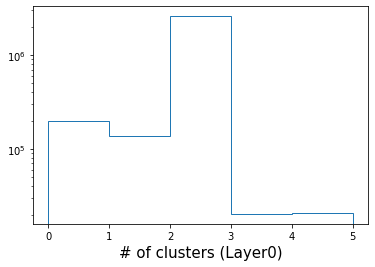

In [49]:
plt.hist(ak.num(ift.fitParam_align_id[ift.fitParam_align_id<100]), bins=np.linspace(0, 5, 6), histtype='step',)
print(np.max(ak.num(ift.fitParam_align_id[ift.fitParam_align_id<100])))
plt.xlabel('# of clusters (Layer0)', fontsize=15)
plt.yscale('log')
plt.show()

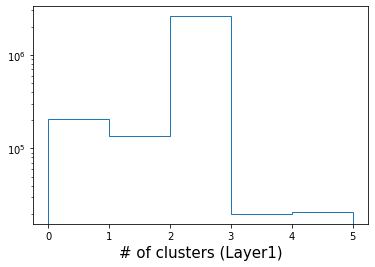

In [50]:
plt.hist(ak.num(ift.fitParam_align_id[(ift.fitParam_align_id<200) & (ift.fitParam_align_id>=100)]), bins=np.linspace(0, 5, 6), histtype='step',)
plt.yscale('log')
plt.xlabel('# of clusters (Layer1)', fontsize=15)
plt.show()

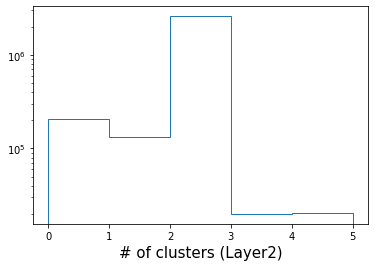

In [51]:
plt.hist(ak.num(ift.fitParam_align_id[(ift.fitParam_align_id>=200) & (ift.fitParam_align_id<1000)]), bins=np.linspace(0, 5, 6), histtype='step',)
plt.yscale('log')
plt.xlabel('# of clusters (Layer2)', fontsize=15)
plt.show()

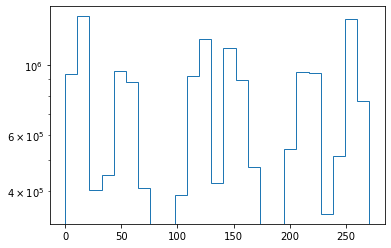

In [30]:
plt.hist(ak.flatten(ift.fitParam_align_id[ift.fitParam_align_id<1000]), bins=25, histtype='step',)
plt.yscale('log')
plt.show()

In [18]:
ak.flatten(ift.fitParam_align_id[ift.fitParam_align_id<1000])

<Array [221, 220, 121, 120, ... 150, 51, 50] type='16352139 * float64'>

In [13]:
tx = ift.fitParam_px/ift.fitParam_pz
ty = ift.fitParam_py/ift.fitParam_pz

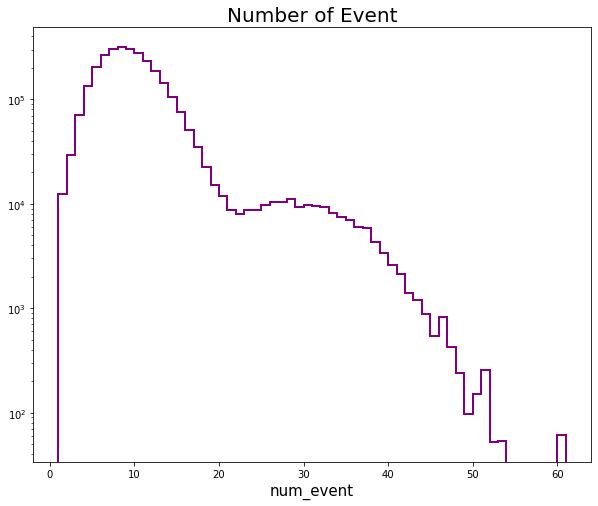

In [16]:
# timestamp = ift['evtTime'] - ak.min(ift['evtTime'])
timestamp = ift['evtTime'] 

# timestamp2 = list(set(timestamp))
track_count_min = collections.Counter(timestamp)
tmp_min = []
for i in timestamp:
    tmp_min.append(track_count_min[i])
    
plt.figure(figsize=(10, 8))
min, max = np.min(tmp_min), np.max(tmp_min)
plt.hist(tmp_min, bins = np.linspace(min, max, round(max-min)+1), histtype='step', linewidth=2, color='purple')
plt.title('Number of Event', fontsize=20)
plt.xlabel('num_event', fontsize=15)

plt.yscale('log')
plt.show()

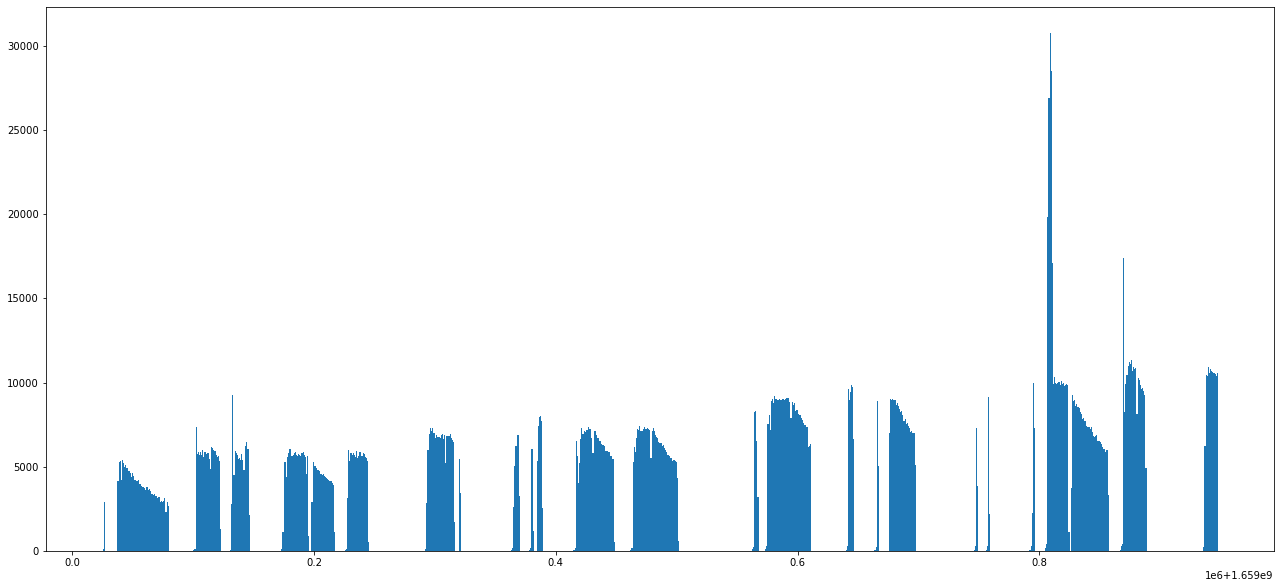

In [15]:
plt.figure(figsize=(22, 10))
plt.hist(ift['evtTime'], bins=1001)
plt.show()

In [85]:
timestamp = ift['evtTime']
print(timestamp)
track_count = collections.Counter(timestamp)
num_evt = []
for i in tqdm(timestamp):
    num_evt.append(track_count[i])

ift_t = ift[np.array(num_evt) >= 18]

[1.66e+09, 1.66e+09, 1.66e+09, 1.66e+09, ... 1.66e+09, 1.66e+09, 1.66e+09, 1.66e+09]


100%|██████████| 2965138/2965138 [00:07<00:00, 387095.50it/s]


In [14]:
att = ak.num(ift['fitParam_align_id'])
att

<Array [24, 19, 24, 24, 24, ... 20, 24, 24, 24] type='2965138 * int64'>

In [16]:
ift_filter = ak.where((np.sqrt(ift['fitParam_x']**2 + ift['fitParam_y']**2) <= 100)
                      & (ift['fitParam_chi2'] < 100) 
                      & (ak.num(ift['fitParam_align_id']) == 24)
                      & (np.sqrt(ift.fitParam_px**2 + ift.fitParam_py**2 + ift.fitParam_pz**2) > 200)
#                       & (abs(tx) < 0.005)
#                       & (abs(ty) < 0.005)
#                       & (np.arctan(np.sqrt(tx**2 + ty**2)) <= 0.46)
#                       & (np.arctan(np.sqrt(tx**2 + ty**2)) >= 0.005)
                      & (ift.VetoNu0_raw_charge<67)
                      & (ift.VetoNu1_raw_charge<67))
#                       & (ift.VetoSt20_raw_charge > 40)
#                       & (ift.VetoSt21_raw_charge > 40)
#                       & (ift.Preshower0_raw_charge > 2.5)
#                       & (ift.Preshower1_raw_charge > 2.5))
#                       & (ift.Calo0_raw_charge > 0.1)
#                       & (ift.Calo1_raw_charge > 0.1)
#                       & (ift.Calo2_raw_charge > 0.1)
#                       & (ift.Calo3_raw_charge > 0.1))

66
2965138
-1908.0500000000006


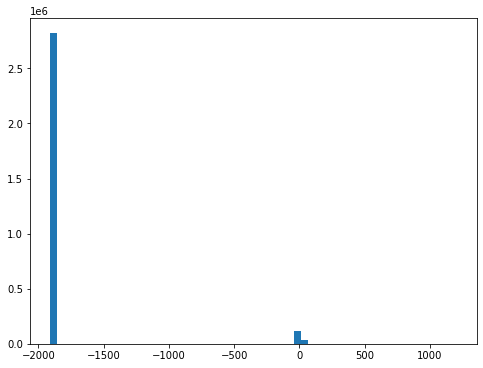

In [17]:
plt.figure(figsize=(8, 6))
# plt.plot(ift.fitParam_z[ift.fitParam_z<-500], ift.fitParam_x[ift.fitParam_z<-500], 'o')
print(len(ift.fitParam_z[ift_filter]))
print(len(ift.fitParam_z))
print(np.min(ift.fitParam_z[ift_filter]))
plt.hist(ift.fitParam_z, bins=60)
plt.show()

In [23]:
# Apply cuts
cut1 = np.sqrt(ift['fitParam_x']**2 + ift['fitParam_y']**2) <= 100
cut2 = ift['fitParam_chi2'] < 100
# cut3 = ak.num(ift['fitParam_align_id']) > 17
cut3 = np.sqrt(ift['fitParam_px']**2 + ift['fitParam_py']**2 + ift['fitParam_pz']**2) > 200
# cut5 = np.arctan(np.sqrt(tx**2 + ty**2)) <= 0.46
# cut6 = np.arctan(np.sqrt(tx**2 + ty**2)) >= 0.005
cut4 = ift['VetoSt20_raw_charge'] > 40
cut5 = ift['VetoSt21_raw_charge'] > 40
cut6 = ift['Preshower0_raw_charge'] > 2.5
cut7 = ift['Preshower1_raw_charge'] > 2.5
cut8 = ift['VetoNu0_raw_charge'] < 40
cut9 = ift['VetoNu1_raw_charge'] < 40
# cut5 = ift['Calo0_raw_charge'] > 0.1
# cut12 = ift['Calo1_raw_charge'] > 0.1
# cut13 = ift['Calo2_raw_charge'] > 0.1
# cut14 = ift['Calo3_raw_charge'] > 0.1
# cut5 = abs(tx) < 0.005
# cut6 = abs(ty) < 0.005


# Print the number of events after each cut
print(f"Initial events: {len(ift)}")
print(f"r <= 100 mm: {np.sum(cut1)}")
print(f"Chi < 100: {np.sum(cut1 & cut2)}")
# print(f"num cluster hits > 17: {np.sum(cut1 & cut2 & cut3)}")
print(f"P > 200 GeV: {np.sum(cut1 & cut2 & cut3)}")
# print(f"abs(Tx) < 0.005: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5)}")
# print(f"abs(Ty) < 0.005: {np.sum(cut1 & cut2 & cut3 & cut4 & cut6)}")
# print(f"Theta <= 0.46 rad: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5)}")
# print(f"Theta >= 0.005 rad: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5 & cut6)}")
print(f"VetoSt20_raw_charge > 40pC: {np.sum(cut1 & cut2 & cut3 & cut4)}")
print(f"VetoSt21_raw_charge > 40pC: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5)}")
print(f"Preshower0_raw_charge > 2.5: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5 & cut6)}")
print(f"Preshower1_raw_charge > 2.5: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5 & cut6 & cut7)}")
print(f"VetoNu0_raw_charge < 40: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5 & cut6 & cut7 & cut8)}")
print(f"VetoNu1_raw_charge < 40: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5 & cut6 & cut7 & cut8 & cut9)}")

# print(f"Calo1_raw_charge > 0.1: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5 & cut6 & cut7 & cut8 & cut9 & cut10 & cut11 & cut12)}")
# print(f"Calo2_raw_charge > 0.1: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5 & cut6 & cut7 & cut8 & cut9 & cut10 & cut11 & cut12 & cut13)}")
# print(f"Calo3_raw_charge > 0.1: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5 & cut6 & cut7 & cut8 & cut9 & cut10 & cut11 & cut12 & cut13 & cut14)}")

Initial events: 2965138
r <= 100 mm: 2564201
Chi < 100: 2462452
P > 200 GeV: 1728485
VetoSt20_raw_charge > 40pC: 1728485
VetoSt21_raw_charge > 40pC: 1728484
Preshower0_raw_charge > 2.5: 1728170
Preshower1_raw_charge > 2.5: 1728071
VetoNu0_raw_charge < 40: 7
VetoNu1_raw_charge < 40: 5


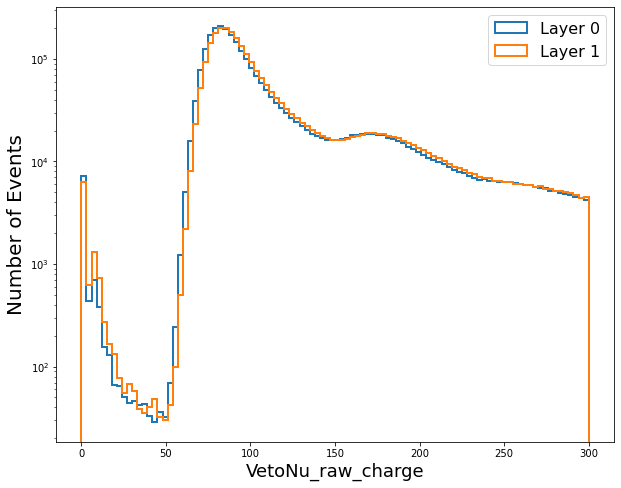

In [33]:
plt.figure(figsize=(10, 8))


# plt.hist(tx[ift_filter], bins=np.linspace(-0.02, 0.02, 101),  histtype='step', linewidth=2, color='green')
# plt.hist(ift.fitParam_pz[ift_filter], bins=60,  histtype='step', linewidth=2, color='green')


# plt.hist(np.arctan(np.sqrt(tx**2 + ty**2)), bins=50,  histtype='step', linewidth=2, color='green')
# plt.xlabel('Theta', fontsize=18)

plt.hist(ift.VetoNu0_raw_charge[(ift.VetoNu0_raw_charge<300)&(ift.VetoNu0_raw_charge>=0)], bins=100,  histtype='step', linewidth=2, label='Layer 0')
plt.hist(ift.VetoNu1_raw_charge[(ift.VetoNu1_raw_charge<300)&(ift.VetoNu1_raw_charge>=0)], bins=100,  histtype='step', linewidth=2, label='Layer 1')
plt.xlabel('VetoNu_raw_charge', fontsize=18)

# plt.hist(ift.VetoSt20_raw_charge[(ift.VetoSt20_raw_charge<300)&(ift.VetoSt20_raw_charge>=0)], bins=50,  histtype='step', linewidth=2, label='Layer 0')
# plt.hist(ift.VetoSt21_raw_charge[(ift.VetoSt21_raw_charge<300)&(ift.VetoSt21_raw_charge>=0)], bins=50,  histtype='step', linewidth=2, label='Layer 1')
# plt.xlabel('VetoSt_raw_charge', fontsize=18)

# plt.hist(ift.Preshower0_raw_charge[(ift.Preshower0_raw_charge<300)&(ift.Preshower0_raw_charge>=0)], bins=50,  histtype='step', linewidth=2, label='Layer 0')
# plt.hist(ift.Preshower1_raw_charge[(ift.Preshower1_raw_charge<300)&(ift.Preshower1_raw_charge>=0)], bins=50,  histtype='step', linewidth=2, label='Layer 1')
# plt.xlabel('Preshower_raw_charge', fontsize=18)

plt.yscale('log')
plt.ylabel('Number of Events', fontsize=20)
plt.legend(fontsize=16, loc='upper right')
plt.show()

In [22]:
len(ift.VetoNu0_raw_charge[ift.VetoNu0_raw_charge<40])

15733

4


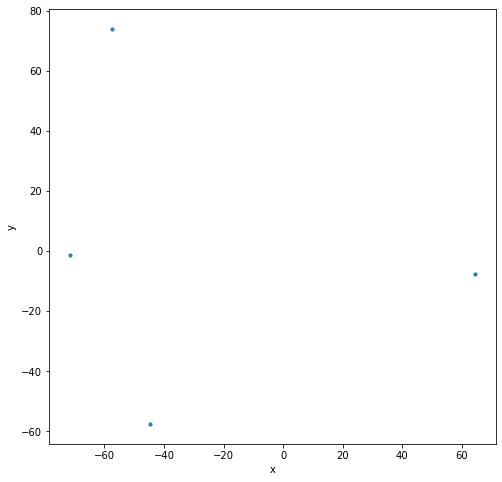

In [143]:
plt.figure(figsize=(8, 8))
print(len(ift['fitParam_x'][ift_filter]))
plt.scatter(ift['fitParam_x'][ift_filter], ift['fitParam_y'][ift_filter], s=10, alpha=0.9)
plt.xlabel('x')
plt.ylabel('y')
# plt.xlim(-121, 121)
# plt.ylim(-121, 121)
plt.show()

In [64]:
grid_cell_size = 10  # mm
x_min, x_max = -100, 100  # x-axis range
y_min, y_max = -100, 100  # y-axis range

# Calculate the number of grid cells in x and y directions
n_cells_x = int((x_max - x_min) / grid_cell_size)
n_cells_y = int((y_max - y_min) / grid_cell_size)

track_density_grid = np.zeros((n_cells_x, n_cells_y))

for x, y in zip(ift['fitParam_x'][ift_filter], ift['fitParam_y'][ift_filter]):
    # Calculate the cell indices for the current track's position
    cell_x = int((x - x_min) / grid_cell_size)
    cell_y = int((y - y_min) / grid_cell_size)
    
    # Increment the corresponding cell in the density grid
    track_density_grid[cell_x, cell_y] += 1
    
total_tracks_before_cuts = len(ift)
track_density_grid /= total_tracks_before_cuts

for i in range(n_cells_x):
    for j in range(n_cells_y):
        cell_x = i * grid_cell_size + x_min
        cell_y = j * grid_cell_size + y_min
        density = track_density_grid[i, j]
        
        print(f"Grid cell ({cell_x} mm, {cell_y} mm): Track density = {density}")

Grid cell (-100 mm, -100 mm): Track density = 0.0
Grid cell (-100 mm, -90 mm): Track density = 0.0
Grid cell (-100 mm, -80 mm): Track density = 0.0
Grid cell (-100 mm, -70 mm): Track density = 0.0
Grid cell (-100 mm, -60 mm): Track density = 0.0
Grid cell (-100 mm, -50 mm): Track density = 0.0
Grid cell (-100 mm, -40 mm): Track density = 0.0
Grid cell (-100 mm, -30 mm): Track density = 0.0
Grid cell (-100 mm, -20 mm): Track density = 0.0
Grid cell (-100 mm, -10 mm): Track density = 0.0
Grid cell (-100 mm, 0 mm): Track density = 0.0
Grid cell (-100 mm, 10 mm): Track density = 0.0
Grid cell (-100 mm, 20 mm): Track density = 0.0
Grid cell (-100 mm, 30 mm): Track density = 0.0
Grid cell (-100 mm, 40 mm): Track density = 0.0
Grid cell (-100 mm, 50 mm): Track density = 0.0
Grid cell (-100 mm, 60 mm): Track density = 0.0
Grid cell (-100 mm, 70 mm): Track density = 0.0
Grid cell (-100 mm, 80 mm): Track density = 0.0
Grid cell (-100 mm, 90 mm): Track density = 0.0
Grid cell (-90 mm, -100 mm): T

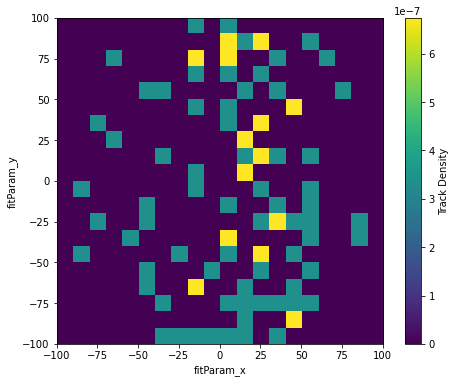

In [65]:
plt.figure(figsize=(8, 6))

# Plot the heatmap
plt.imshow(track_density_grid.T, origin='lower', extent=[x_min, x_max, y_min, y_max], cmap='viridis')
plt.colorbar(label='Track Density')

# Set plot limits and labels
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('fitParam_x')
plt.ylabel('fitParam_y')

plt.show()

66


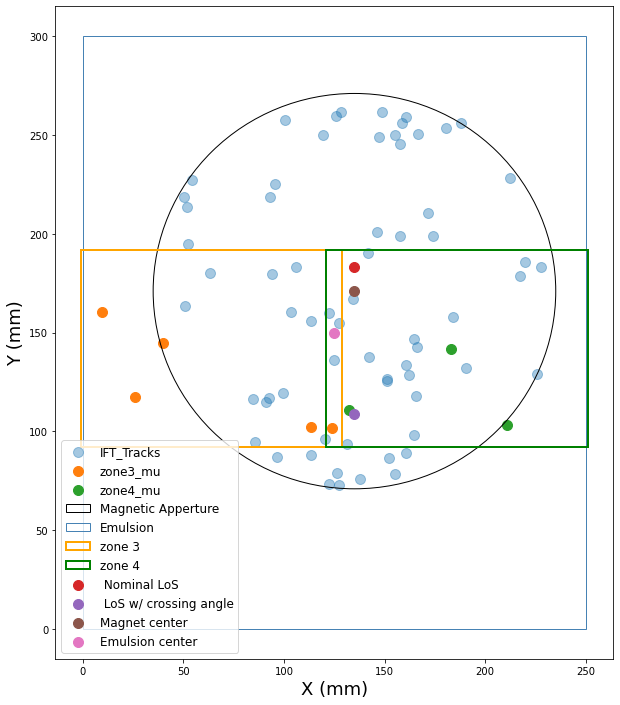

In [18]:
plt.figure(figsize=(10, 12))
print(len(ift['fitParam_x'][ift_filter]))
plt.scatter(ift['fitParam_x'][ift_filter]+125+10, ift['fitParam_y'][ift_filter]+171, s=100, alpha=0.4, label='IFT_Tracks')
plt.scatter(z3_x_values/1e3 - 1, z3_y_values/1e3 + 92, s=100, label='zone3_mu')
plt.scatter(x_values/1e3 + 121, y_values/1e3 + 92, s=100, label='zone4_mu')
# print(emu.x_pred, emu.y_pred, emu.id)

from matplotlib.patches import Rectangle, Circle

circle = Circle((125+10, 171), 100, edgecolor='black', facecolor='none', label='Magnetic Apperture')
plt.gca().add_patch(circle)

rect = Rectangle((0, 0), 250, 300, edgecolor='steelblue', facecolor='none', label='Emulsion')
plt.gca().add_patch(rect)

rect = Rectangle((-1, 92), 130, 100, edgecolor='orange', facecolor='none', label='zone 3', linewidth=2)
plt.gca().add_patch(rect)

rect = Rectangle((121, 92), 130, 100, edgecolor='green', facecolor='none', label='zone 4', linewidth=2)
plt.gca().add_patch(rect)

plt.scatter(125+10, 183, s=100, label=' Nominal LoS')
plt.scatter(125+10, 109, s=100, label=' LoS w/ crossing angle')
plt.scatter(125+10, 171, s=100, label='Magnet center')
plt.scatter(125, 150, s=100, label='Emulsion center')



plt.xlabel('X (mm)', fontsize=18)
plt.ylabel('Y (mm)', fontsize=18)
plt.legend(fontsize=12, loc='lower left')
plt.show()


In [20]:
# distance from IFT to closest emulsion plate [mm]
DistEmuIft = 555.84

# Z position of module 0 and 2, which is smallest z position in IFT 1st layer
module0_z = -1898.05 + 3000 # mm

# Z position of module 4 and 6, which is largest z position in IFT 1st layer
# module4_z = -1885.25 # mm
module4_z = -1885.25 + 3000 # mm (in emulsion system)


# Emulsion to IFT Extrapolation
# Step 1: Emulsion to IFT module 4
def emu2ift(x, y, z, tx, ty):
#     Dist_tot = DistEmuIft + np.abs(module0_z - module4_z)
    Dist_tot = np.abs(z - module0_z)
    print("DDD: ", Dist_tot)
    x_pred = Dist_tot * tx + x
    y_pred = Dist_tot * ty + y
    return x_pred, y_pred

combined_trans_emu_x = np.concatenate((x_values/1e3 + 121, z3_x_values/1e3 - 1))
combined_trans_emu_y = np.concatenate((y_values/1e3 + 92, z3_y_values/1e3 + 92))

emu_x_pred, emu_y_pred = emu2ift(combined_trans_emu_x, combined_trans_emu_y, combined_z/1e3, combined_tx, combined_ty)

def ift2ift(x, y, z, tx, ty):
#     z=-1886.14
    Dist_tot = np.abs(z - module0_z)
    x_pred = Dist_tot * tx + x
    y_pred = Dist_tot * ty + y
    return x_pred, y_pred

iftx = ift['fitParam_x'][ift_filter]+125+10
ifty = ift['fitParam_y'][ift_filter]+171
ifttx = tx[ift_filter]
iftty = ty[ift_filter]
ift_x_pred, ift_y_pred = ift2ift(iftx, ifty, ift.fitParam_z[ift_filter]+3000, ifttx, iftty)


DDD:  [586.466 594.165 869.161 614.976 697.465 899.356 798.029 903.708]


In [21]:
np.sqrt(ift.fitParam_px**2 + ift.fitParam_py**2 + ift.fitParam_pz**2)
print(len(ift.fitParam_px[ift_filter]),
len(ift_y_pred))

66 66


In [22]:
emu = pd.DataFrame({
    'x_pred': emu_x_pred,
    'y_pred': emu_y_pred,
    'tx': combined_tx,
    'ty': combined_ty,
    'id': all_id
})
emu

,x_pred,y_pred,tx,ty,id
0,135.460205,94.479558,0.005728,-0.028008,4897.0
1,214.959217,107.714644,0.007136,0.007453,14341.0
2,160.082788,142.617648,-0.026048,0.001312,28023.0
3,125.833271,103.105806,0.020308,0.001163,3119.0
4,28.471823,133.976820,0.003287,0.023901,7366.0
5,6.224101,159.835669,-0.003670,-0.000716,19847.0
6,129.812386,93.076726,0.007573,-0.010743,24625.0
7,38.886546,161.434832,-0.001148,0.018618,29724.0


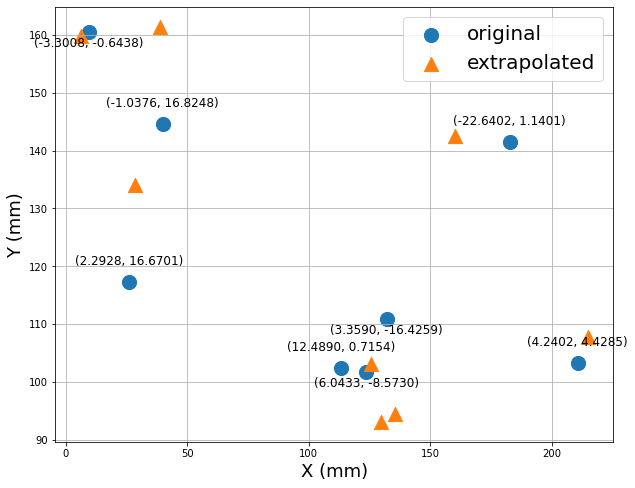

In [152]:

# Assuming you have the following arrays: combined_x, combined_y, emu_x_pred, emu_y_pred

# Calculate the residuals
residuals_x = emu.x_pred - combined_trans_emu_x
residuals_y = emu.y_pred - combined_trans_emu_y

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(combined_trans_emu_x , combined_trans_emu_y , s=200, label='original')
plt.scatter(emu.x_pred , emu.y_pred, s=200, marker='^', label='extrapolated')

#Add the residuals text near each point
for x, y, res_x, res_y in zip(combined_trans_emu_x, combined_trans_emu_y, residuals_x, residuals_y):
    if res_y < 0:
        plt.text(x, y-3, f"({res_x:.4f}, {res_y:.4f})", fontsize=12, ha='center', va='bottom')
    else:
        plt.text(x, y+3, f"({res_x:.4f}, {res_y:.4f})", fontsize=12, ha='center')


plt.xlabel('X (mm)', fontsize=18)
plt.ylabel('Y (mm)', fontsize=18)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

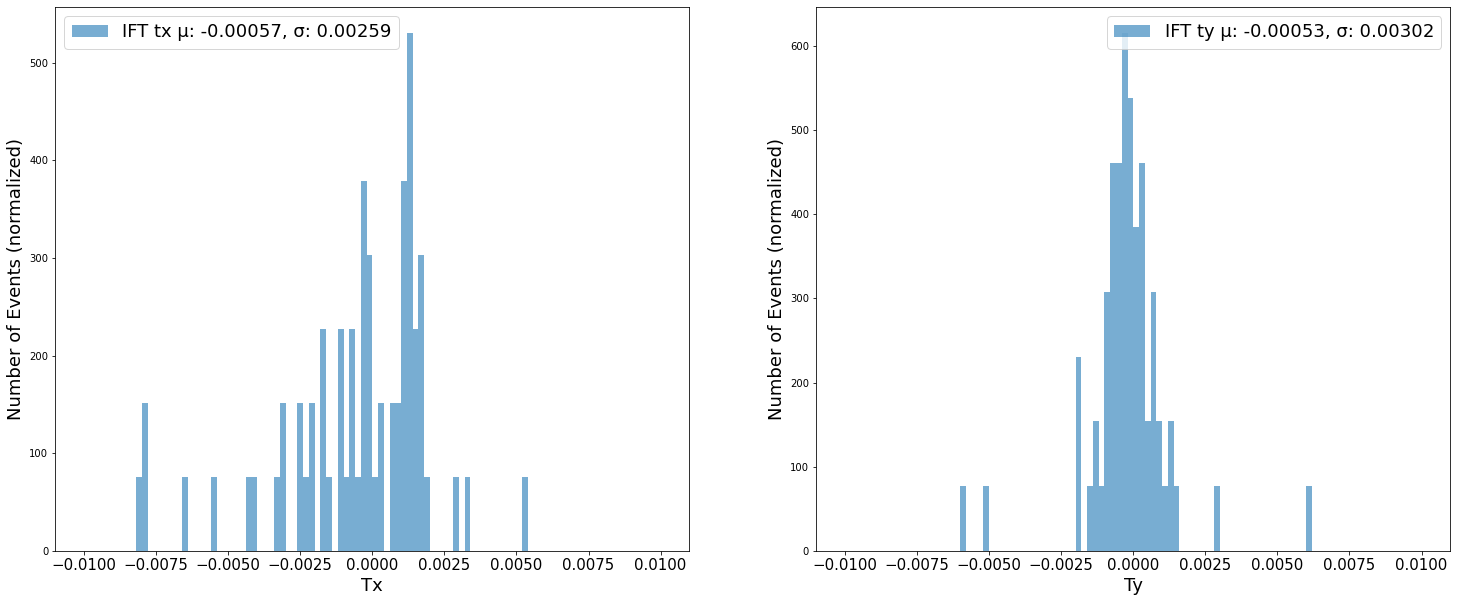

In [23]:
# tx
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
bin = np.linspace(-0.01, 0.01, 101)
round_num = 5

# emutx_mean, emutx_std = round(np.mean(emu['tx']), round_num), round(np.std(emu['tx']), round_num)
# plt.hist(emu['tx'], bins=bin, alpha=.6, density=True, label=f'Emu tx µ: {emutx_mean}, σ: {emutx_std}')

ifttx_mean, ifttx_std = round(np.mean(ifttx), round_num), round(np.std(ifttx), round_num)
plt.hist(ifttx, bins=bin, alpha=.6, density=True, label=f'IFT tx µ: {ifttx_mean}, σ: {ifttx_std}')

plt.xlabel('Tx', fontsize=18)
plt.ylabel('Number of Events (normalized)', fontsize=18)
plt.xticks(fontsize=15)
plt.legend(fontsize=18)

# ty
plt.subplot(1, 2, 2)
bin = np.linspace(-0.01, 0.01, 101)
# emuty_mean, emuty_std = round(np.mean(emu['ty']), round_num), round(np.std(emu['ty']), round_num)
# plt.hist(emu['ty'], bins=bin, alpha=.6, density=True, label=f'Emu ty µ: {emuty_mean}, σ: {emuty_std}')

iftty_mean, iftty_std = round(np.mean(iftty), round_num), round(np.std(iftty), round_num)
plt.hist(iftty, bins=bin, alpha=.6, density=True, label=f'IFT ty µ: {iftty_mean}, σ: {iftty_std}')

plt.xlabel('Ty', fontsize=18)
plt.ylabel('Number of Events (normalized)', fontsize=18)
plt.xticks(fontsize=15)
plt.legend(fontsize=18)
plt.show()

0    135.460205
1    214.959217
2    160.082788
3    125.833271
4     28.471823
5      6.224101
6    129.812386
7     38.886546
Name: x_pred, dtype: float64 0     94.479558
1    107.714644
2    142.617648
3    103.105806
4    133.976820
5    159.835669
6     93.076726
7    161.434832
Name: y_pred, dtype: float64 0     4897.0
1    14341.0
2    28023.0
3     3119.0
4     7366.0
5    19847.0
6    24625.0
7    29724.0
Name: id, dtype: float64 [515.484 507.785 232.789 486.974 404.485 202.594 303.921 198.242]
[101, 113, 126, 151, 120, 95.6, 138, 125, ... 155, 128, 159, 188, 126, 161, 131] [258, 156, 260, 126, 96, 225, 75.9, 136, ... 250, 73.1, 256, 256, 79.2, 89.1, 93.9]


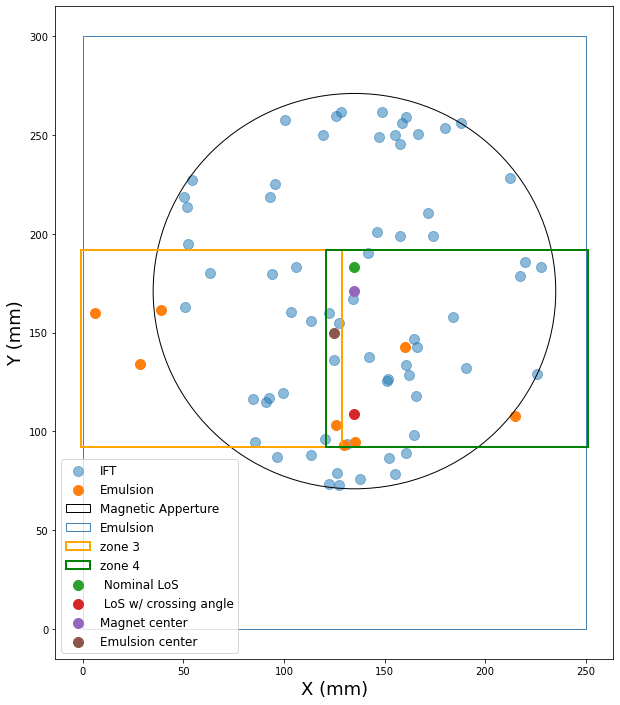

In [24]:
plt.figure(figsize=(10, 12))

plt.scatter(ift_x_pred, ift_y_pred, s=100, alpha=0.5, label='IFT')
plt.scatter(emu.x_pred, emu.y_pred, s=100, label='Emulsion')
print(emu.x_pred, emu.y_pred, emu.id, combined_z/1e3)
print(ift_x_pred, ift_y_pred)
from matplotlib.patches import Rectangle, Circle

circle = Circle((125+10, 171), 100, edgecolor='black', facecolor='none', label='Magnetic Apperture')
plt.gca().add_patch(circle)

rect = Rectangle((0, 0), 250, 300, edgecolor='steelblue', facecolor='none', label='Emulsion')
plt.gca().add_patch(rect)

rect = Rectangle((-1, 92), 130, 100, edgecolor='orange', facecolor='none', label='zone 3', linewidth=2)
plt.gca().add_patch(rect)

rect = Rectangle((121, 92), 130, 100, edgecolor='green', facecolor='none', label='zone 4', linewidth=2)
plt.gca().add_patch(rect)

plt.scatter(125+10, 183, s=100, label=' Nominal LoS')
plt.scatter(125+10, 109, s=100, label=' LoS w/ crossing angle')
plt.scatter(125+10, 171, s=100, label='Magnet center')
plt.scatter(125, 150, s=100, label='Emulsion center')



plt.xlabel('X (mm)', fontsize=18)
plt.ylabel('Y (mm)', fontsize=18)
plt.legend(fontsize=12, loc='lower left')
plt.show()


In [27]:
# x_res, y_res, tx_res, ty_res = 1.7211, 0.1811, 0.01406, 0.00295 # obtain these from truth match residual
x_res, y_res, tx_res, ty_res = 0.6, 0.028, 0.000474, 0.000254
#x_res, y_res, tx_res, ty_res = 1, 1, 0.000474, 0.000254

# x_res, y_res, tx_res, ty_res = 0.9, 0.1, 0.05, 0.05

search_scale = 10
Chi2 = []
resx, resy, restx, resty = [], [], [], []
emu_id = []
ift_mom = []
ift_ty, ift_tx  = [], []
emu_ty, emu_tx  = [], []


for i in range(len(ift_x_pred)):
    # Select a box for each track
    #emu_filter = emu[(emu.x_pred > ift_x_pred[i]-search_scale*x_res/2) & (emu.x_pred < ift_x_pred[i]+search_scale*x_res/2) & (emu.y_pred > ift_y_pred[i]-search_scale*y_res/2) & (emu.y_pred < ift_y_pred[i]+search_scale*y_res/2)]
    emu_filter = emu[(emu.x_pred > ift_x_pred[i]-search_scale) 
                     & (emu.x_pred < ift_x_pred[i]+search_scale) 
                     & (emu.y_pred > ift_y_pred[i]-search_scale) 
                     & (emu.y_pred < ift_y_pred[i]+search_scale)]

    # Matching Chi2
#     chi2 = np.sqrt((ift_x_pred[i]-emu_filter.x_pred)**2/(x_res)**2 + 
#                    (ift_y_pred[i]-emu_filter.y_pred)**2/(y_res)**2 + 
#                    (ifttx[i]-emu_filter.tx)**2/(tx_res)**2 + 
#                    (iftty[i]-emu_filter.ty)**2/(ty_res)**2)
    chi2 = np.sqrt((ift_x_pred[i]-emu_filter.x_pred)**2/(x_res)**2 + 
                   (ift_y_pred[i]-emu_filter.y_pred)**2/(y_res)**2)

#     if (len(emu_filter)>0 and len(chi2)>0): print("chi2: ", chi2)
    if np.min(chi2) < 50:
        print(np.min(chi2))
        min_num = np.where(chi2==np.min(chi2))[0][0]
        resx.append(ift_x_pred[i] - emu_filter.x_pred.iloc[min_num])
        resy.append(ift_y_pred[i] - emu_filter.y_pred.iloc[min_num])
        restx.append(ifttx[i] - emu_filter.tx.iloc[min_num])
        resty.append(iftty[i] - emu_filter.ty.iloc[min_num])
        ift_mom.append(np.sqrt(ift.fitParam_px[ift_filter][i]**2 + ift.fitParam_py[ift_filter][i]**2 + ift.fitParam_pz[ift_filter][i]**2))
        emu_id.append(emu_filter.id.iloc[min_num])
        ift_ty.append(iftty[i])
        ift_tx.append(ifttx[i])
        emu_ty.append(emu_filter.ty.iloc[min_num])
        emu_tx.append(emu_filter.tx.iloc[min_num])


print(resx, resy, restx, resty)
print(emu_id)
print(ift_mom)
print("IFTTT: ", ift_ty, ift_tx)
print(emu_ty, emu_tx)

10.988665088343588
22.465721026655622
[6.177395894524636, -4.0450799515106155] [-0.10753658437505464, -0.6000477447638701] [0.03125457561289736, -0.006168090833944844] [0.00013622190546413548, 0.029206002389637244]
[28023.0, 4897.0]
[228.42016075677475, 1368.200111798667]
IFTTT:  [0.0014480023422159952, 0.0011976581743043508] [0.005206223594133389, -0.00044055462630236285]
[0.0013117804367518597, -0.028008344215332895] [-0.026048352018763966, 0.005727536207642481]


In [311]:
#### MC
f_mc = uproot.open('/eos/home-a/agarabag/new_ift_algnm_v2/run/mc_100043_no_p_cuts/kfalignment_mc.root')
ift_mc = f_mc['trackParam'].arrays(['fitParam_x',
                      'fitParam_y',
                      'fitParam_px',
                      'fitParam_py',
                      'fitParam_pz',
                      'fitParam_chi2',
                      'fitParam_nMeasurements',
                      'fitParam_align_id'], library='ak')

KeyboardInterrupt: 

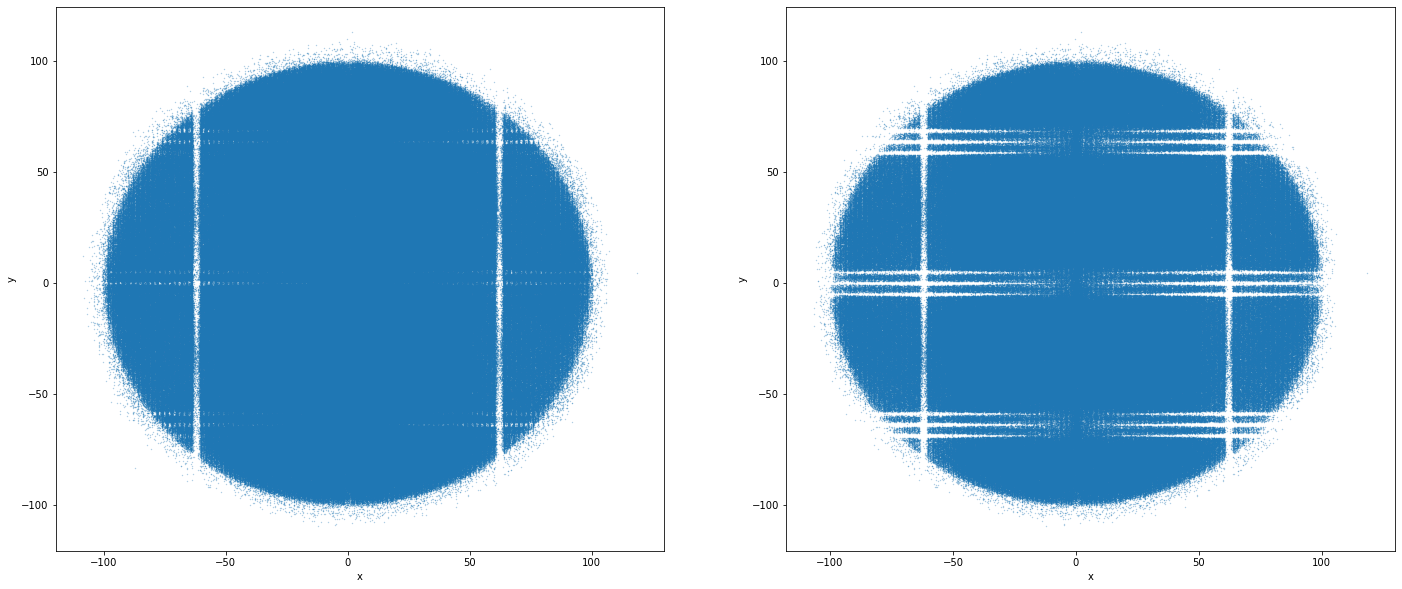

In [7]:
tx = ift_mc.fitParam_px/ift_mc.fitParam_pz
ty = ift_mc.fitParam_py/ift_mc.fitParam_pz
ift_filter = ak.where((abs(ift_mc['fitParam_x']) < 120) 
                      & (abs(ift_mc['fitParam_y']) < 120) 
                      & (ift_mc['fitParam_chi2'] < 100) 
                      & (ak.num(ift_mc['fitParam_align_id']) > 18))
#                       & (np.sqrt(ift_mc.fitParam_px**2 + ift_mc.fitParam_py**2 + ift_mc.fitParam_pz**2) > 200))
#                       & (np.arctan(np.sqrt(tx**2 + ty**2)) <= 0.46)
#                       & (np.arctan(np.sqrt(tx**2 + ty**2)) >= 0.005))
ift_filter2 = ak.where((abs(ift_mc['fitParam_x']) < 120) 
                      & (abs(ift_mc['fitParam_y']) < 120) 
                      & (ift_mc['fitParam_chi2'] < 100) 
                      & (ak.num(ift_mc['fitParam_align_id']) > 22))

plt.figure(figsize=(24, 10))
plt.subplot(1, 2, 1)
plt.scatter(ift_mc['fitParam_x'][ift_filter], ift_mc['fitParam_y'][ift_filter], s=0.1, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(ift_mc['fitParam_x'][ift_filter2], ift_mc['fitParam_y'][ift_filter2], s=0.1, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [19]:
#### MC
f_mc = uproot.open('/eos/experiment/fasernu-data0/muons_100040_reco/pl671_700/linked_tracks.root')
ift_mc = f_mc['tracks'].arrays(['sf.eX',
                               'sf.eY',
                               'sf.eZ',
                               'sf.eTX',
                               'sf.eTY'], library='ak')

In [20]:
f_track_mc = uproot.open('/eos/home-a/agarabag/new_ift_algnm_v2/run/mc_100040/kfalignment_mc.root')
ift_track_mc = f_track_mc['trackParam'].arrays(['fitParam_x',
                      'evtTime', 
                      'fitParam_y',
                      'fitParam_px',
                      'fitParam_py',
                      'fitParam_pz',
                      'fitParam_chi2',
                      'fitParam_nMeasurements',
                      'fitParam_align_id'], library='ak')

In [23]:
ift_track_mc['fitParam_y']

<Array [-18.4, 22.4, -7.25, ... 11.5, 20.2] type='127567 * float64'>

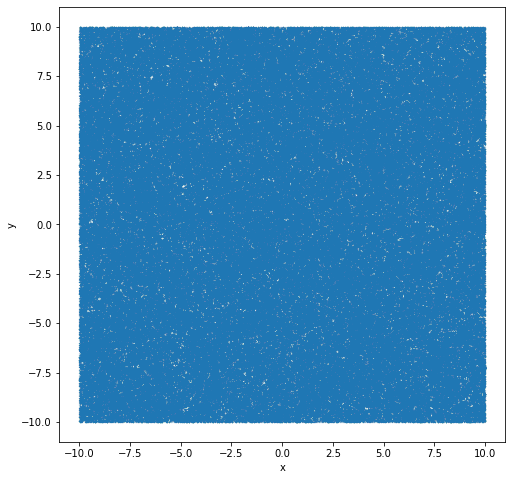

In [28]:
plt.figure(figsize=(8, 8))
plt.scatter(ak.flatten(ift_mc['sf.eX']/1e3), ak.flatten(ift_mc['sf.eY']/1e3), s=0.01, alpha=0.5)
# plt.scatter(ift_track_mc['fitParam_x'], ift_track_mc['fitParam_y'], s=0.1, alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')

plt.show()